# # DATA PREPARATION

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.cluster import KMeans
from joblib import dump # Import the dump function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import joblib # For saving models and encoders
from sklearn.preprocessing import label_binarize # For potential AUC calculation

In [3]:
#load dataset
df_orig = pd.read_csv("dataset.csv") 

df_orig.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
symptom_desc = pd.read_csv("symptom_Description.csv")
symptom_desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [5]:
symptom_precaution = pd.read_csv("symptom_precaution.csv")
symptom_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [6]:
symptom_severity = pd.read_csv("Symptom-severity.csv")
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [7]:
df_orig.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
#copy df
df = df_orig.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [10]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [11]:
symptom_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [12]:
symptom_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [13]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


# CEK NULL

In [14]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [15]:
symptom_desc.isnull().sum()

Disease        0
Description    0
dtype: int64

In [16]:
symptom_severity.isnull().sum()

Symptom    0
weight     0
dtype: int64

##  Visualisasi gejala

In [17]:
import matplotlib.pyplot as plt

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\906731512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")


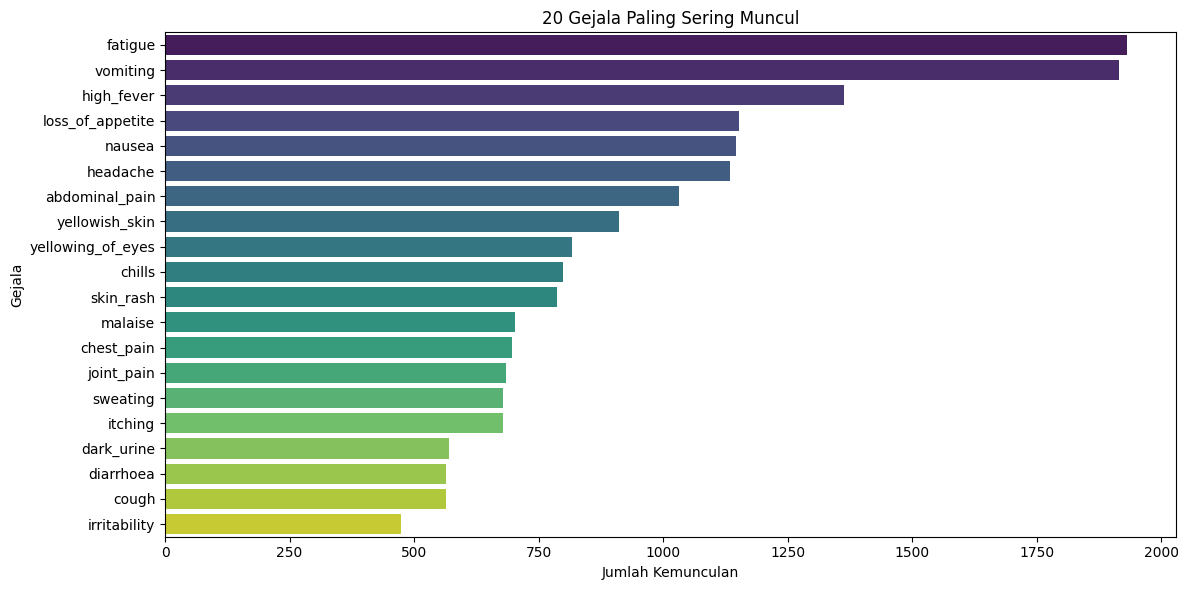

In [18]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]

all_symptoms = df[symptom_cols].values.ravel()

all_symptoms = pd.Series(all_symptoms).dropna().astype(str).str.strip().str.lower().str.replace(' ', '_')

symptom_counts = all_symptoms.value_counts().head(20)  

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")
plt.title('20 Gejala Paling Sering Muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Gejala')
plt.tight_layout()
plt.show()

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\2303506419.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


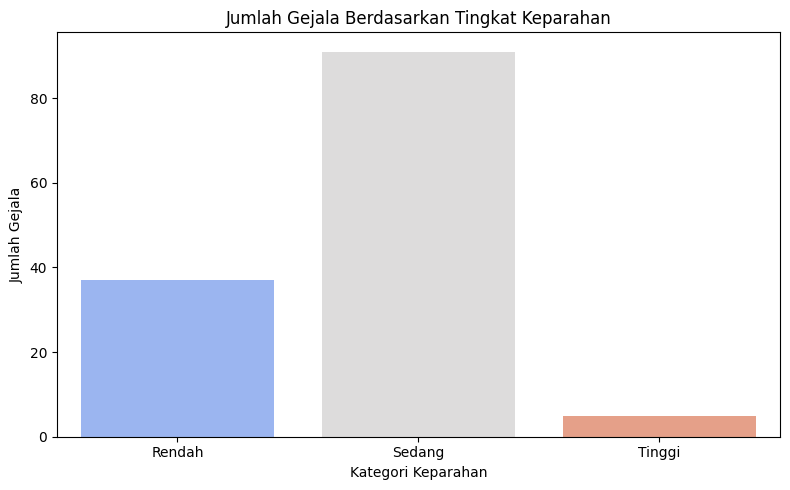

In [19]:
symptom_severity.columns = symptom_severity.columns.str.strip().str.lower()

def map_severity(weight):
    if weight <= 3:
        return 'Rendah'
    elif 4 <= weight <= 6:
        return 'Sedang'
    else:
        return 'Tinggi'

symptom_severity['kategori_keparahan'] = symptom_severity['weight'].apply(map_severity)

# Hitung jumlah gejala untuk setiap kategori
severity_counts = symptom_severity['kategori_keparahan'].value_counts().reindex(['Rendah', 'Sedang', 'Tinggi'])

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
plt.title('Jumlah Gejala Berdasarkan Tingkat Keparahan')
plt.xlabel('Kategori Keparahan')
plt.ylabel('Jumlah Gejala')
plt.tight_layout()
plt.show()

Jumlah nilai yang hilang di setiap kolom kategorikal:
 - Symptom_4: 348 nilai hilang
 - Symptom_5: 1206 nilai hilang
 - Symptom_6: 1986 nilai hilang
 - Symptom_7: 2652 nilai hilang
 - Symptom_8: 2976 nilai hilang
 - Symptom_9: 3228 nilai hilang
 - Symptom_10: 3408 nilai hilang
 - Symptom_11: 3726 nilai hilang
 - Symptom_12: 4176 nilai hilang
 - Symptom_13: 4416 nilai hilang
 - Symptom_14: 4614 nilai hilang
 - Symptom_15: 4680 nilai hilang
 - Symptom_16: 4728 nilai hilang
 - Symptom_17: 4848 nilai hilang


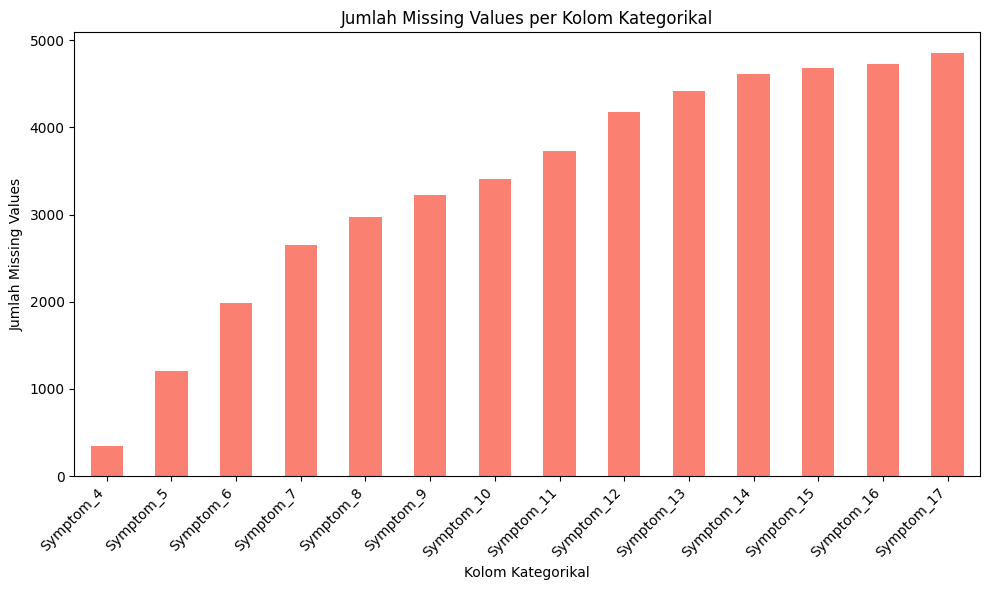


Persentase nilai yang hilang di kolom kategorikal:
 - Symptom_4: 7.07%
   >>> Symptom_4 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_5: 24.51%
   >>> Symptom_5 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_6: 40.37%
   >>> Symptom_6 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_7: 53.90%
   >>> Symptom_7 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_8: 60.49%
   >>> Symptom_8 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_9: 65.61%
   >>> Symptom_9 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_10: 69.27%
   >>> Symptom_10 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan

In [20]:
# --- Pastikan df Anda sudah terdefinisi ---
# Misalnya, jika df Anda adalah hasil dari pd.read_csv('nama_file_anda.csv')
# df = pd.read_csv('your_dataset.csv')
# Atau jika Anda menggunakannya dari sesi sebelumnya, pastikan df ada di scope

# 1. Pilih hanya kolom dengan tipe data 'object' (kategorikal)
categorical_columns = df.select_dtypes(include='object')

# 2. Hitung jumlah missing values untuk setiap kolom kategorikal
#    Ini akan menghasilkan Pandas Series
missing_values_categorical = categorical_columns.isnull().sum()

# Filter hanya kolom yang benar-benar memiliki missing values agar plot lebih rapi
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

print("Jumlah nilai yang hilang di setiap kolom kategorikal:")
if not missing_values_categorical.empty:
    for col, count in missing_values_categorical.items():
        print(f" - {col}: {count} nilai hilang")
else:
    print("Tidak ada nilai hilang di kolom kategorikal.")

# --- Visualisasi Missing Values Kategorikal ---
if not missing_values_categorical.empty:
    plt.figure(figsize=(10, 6)) # Ukuran figure disesuaikan
    # Gunakan .plot(kind="bar") pada Pandas Series langsung
    missing_values_categorical.plot(kind="bar", color="salmon")
    plt.title("Jumlah Missing Values per Kolom Kategorikal")
    plt.ylabel("Jumlah Missing Values")
    plt.xlabel("Kolom Kategorikal")
    plt.xticks(rotation=45, ha='right') # Rotasi dan alignment agar nama kolom tidak tumpang tindih
    plt.tight_layout() # Menyesuaikan layout agar semua label terlihat
    plt.show()
else:
    print("\nTidak ada missing values untuk divisualisasikan di kolom kategorikal.")


# --- Analisis Persentase Missing Values Kategorikal ---
total_rows = len(df) # Jumlah total baris di DataFrame asli

if not missing_values_categorical.empty:
    # Hitung persentase missing values untuk kolom kategorikal
    missing_percent_categorical = (missing_values_categorical / total_rows) * 100

    print("\nPersentase nilai yang hilang di kolom kategorikal:")
    for col in missing_percent_categorical.index:
        percent = missing_percent_categorical[col]
        print(f" - {col}: {percent:.2f}%") # Format 2 angka di belakang koma

        if percent >= 80:
            print(f"   >>> {col} memiliki lebih dari 80% nilai kosong. Menghapus kolom ini mungkin lebih baik daripada imputasi.\n")
        else: # Termasuk 0% missing, atau di bawah 80%
            print(f"   >>> {col} memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.\n")
else:
    print("\nTidak ada kolom kategorikal dengan nilai yang hilang untuk dianalisis persentasenya.")

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


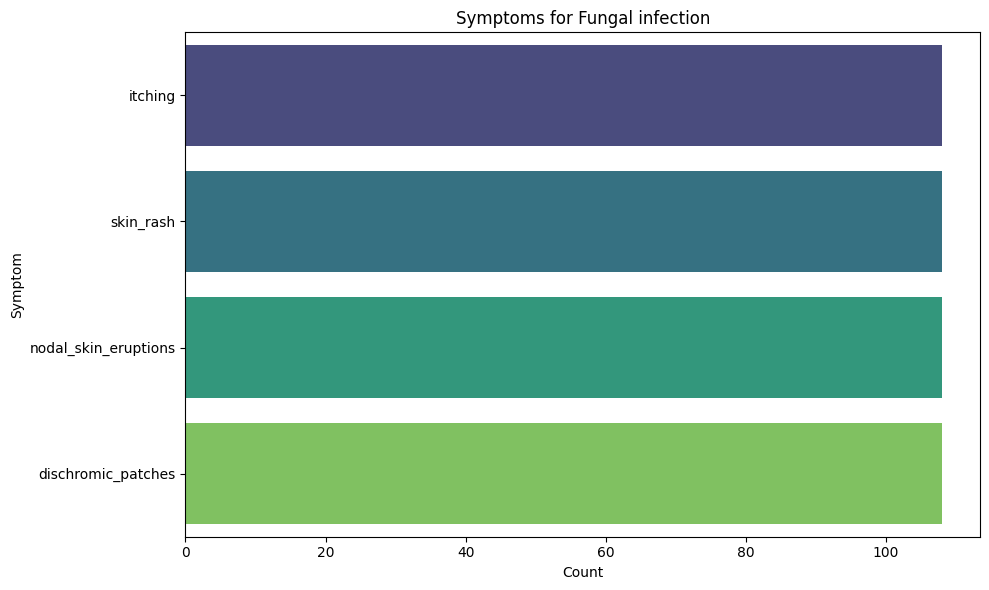

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


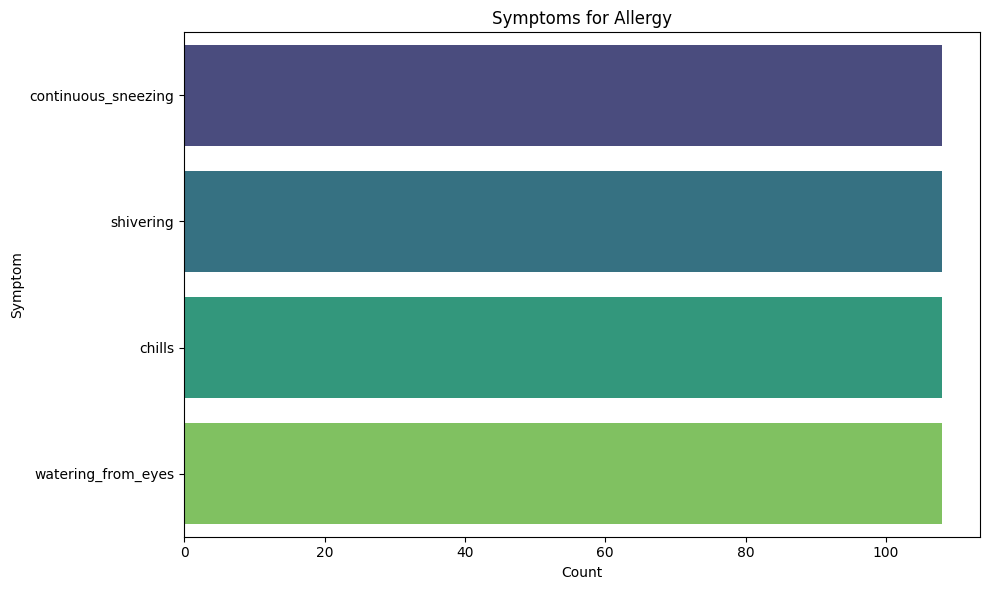

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


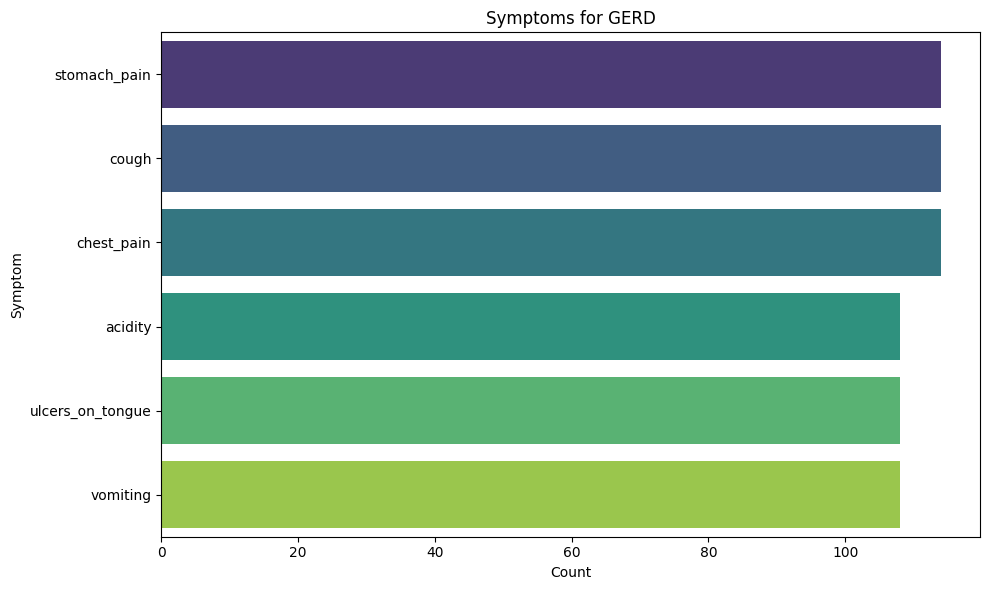

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


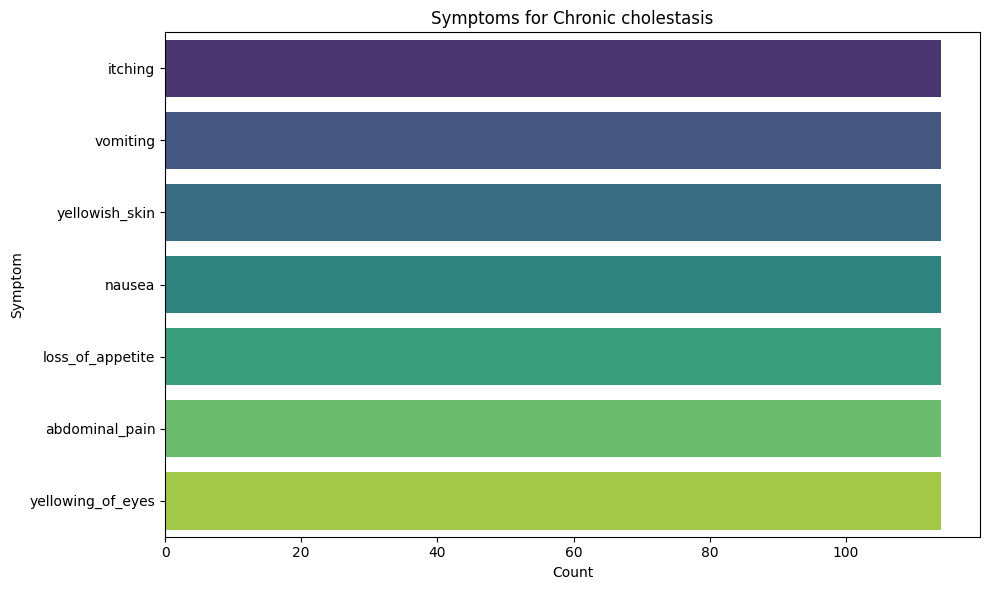

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


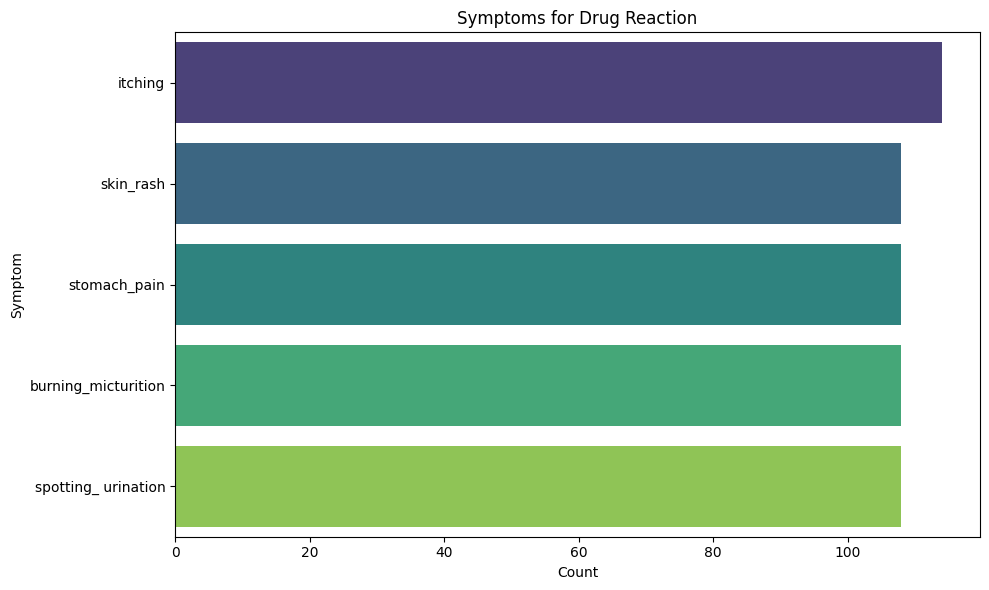

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


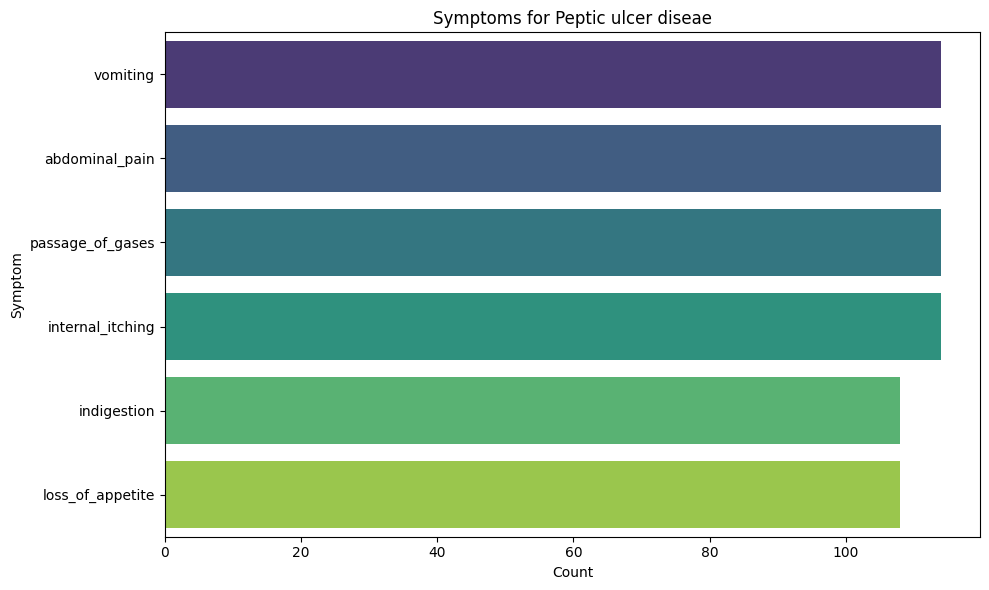

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


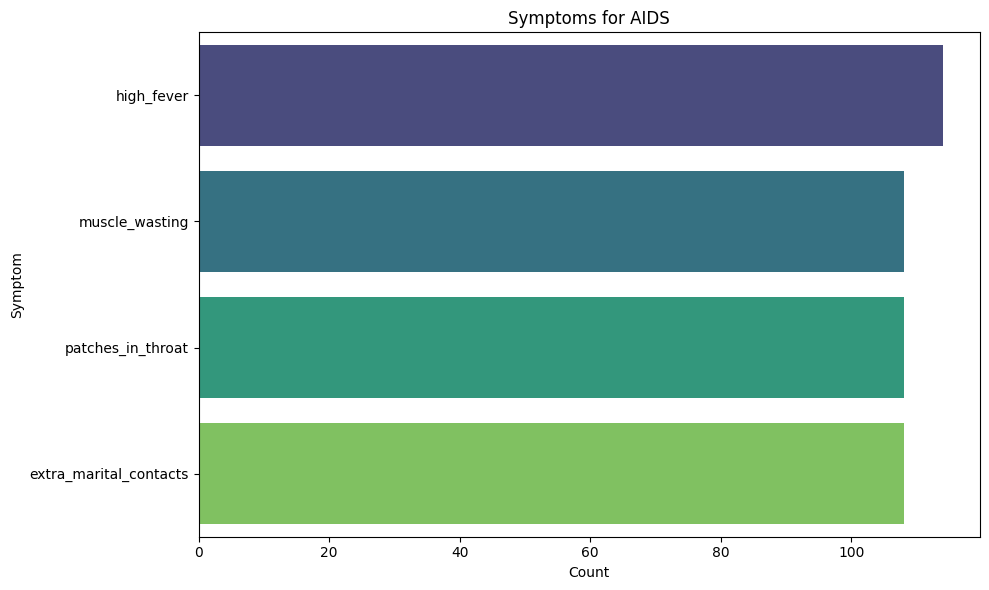

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


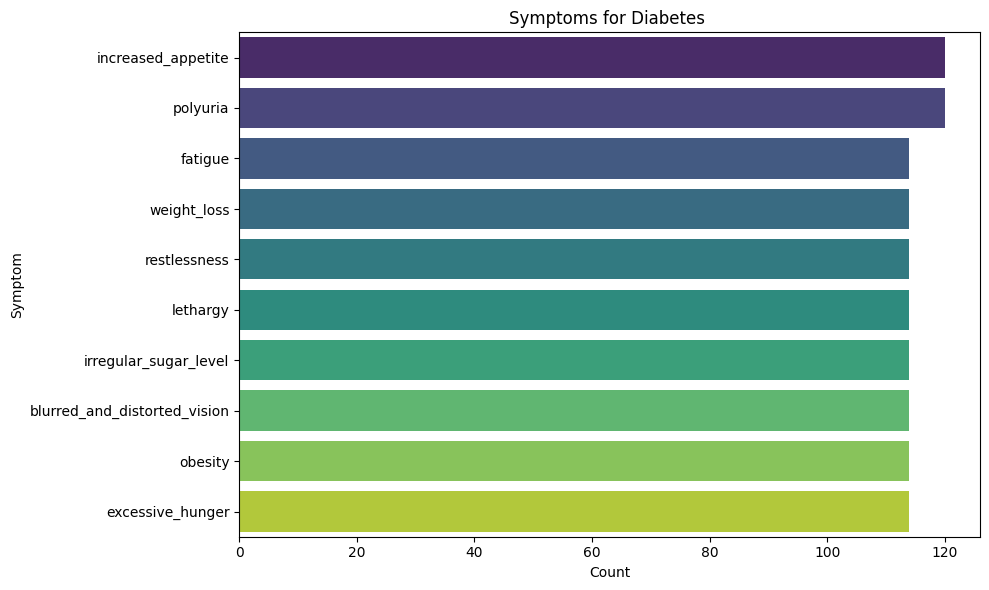

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


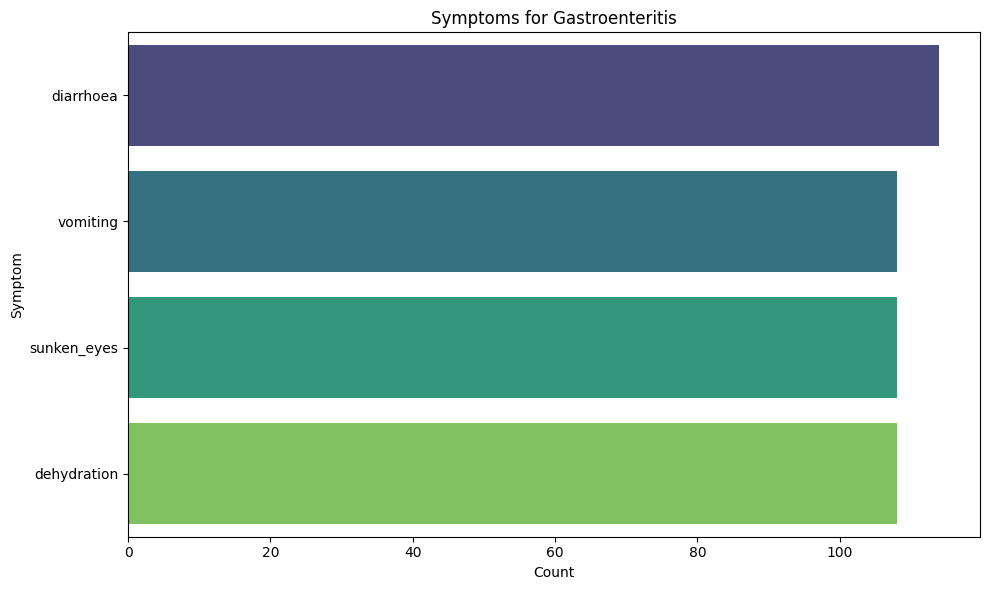

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


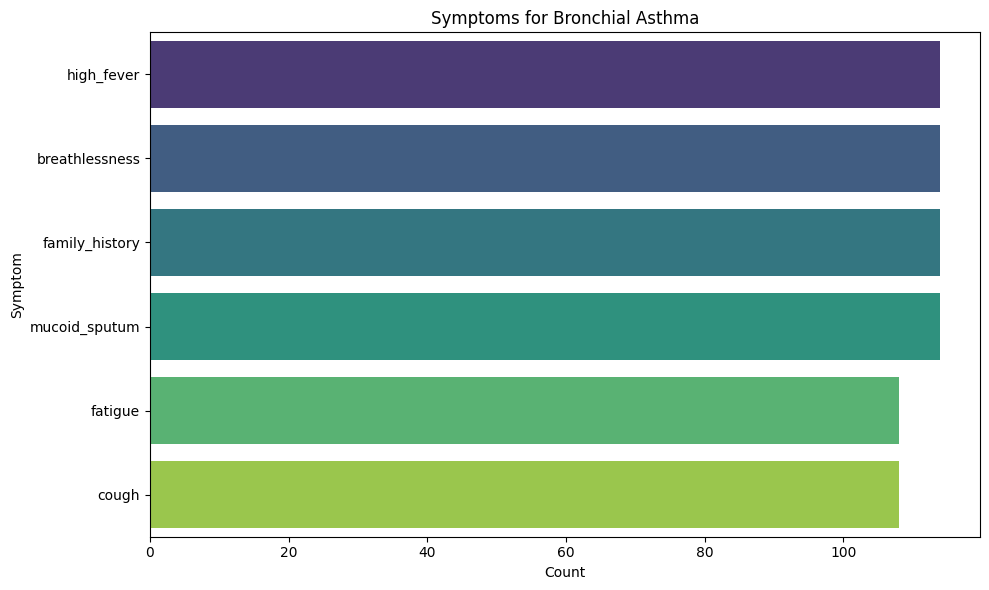

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


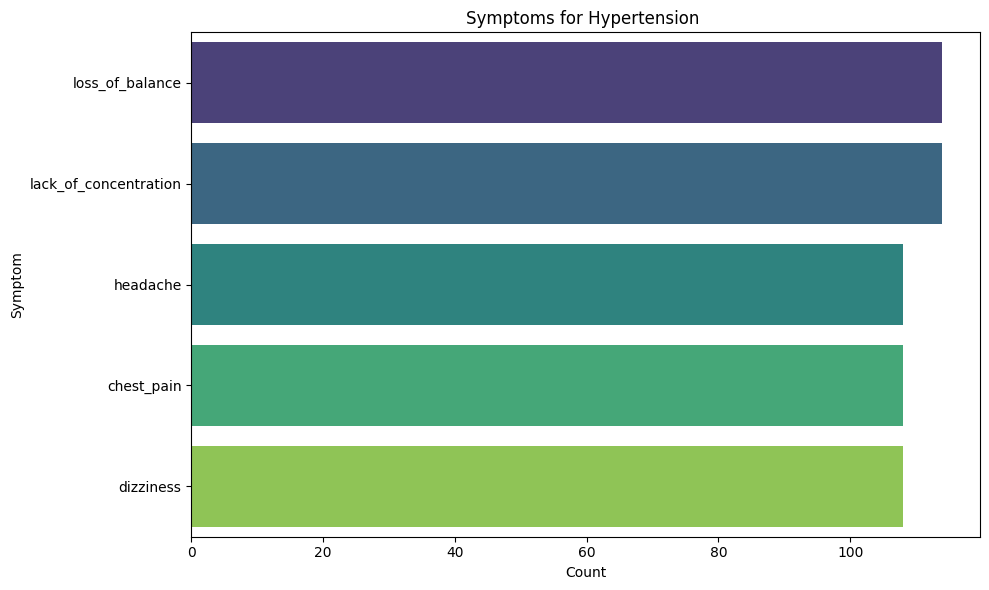

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


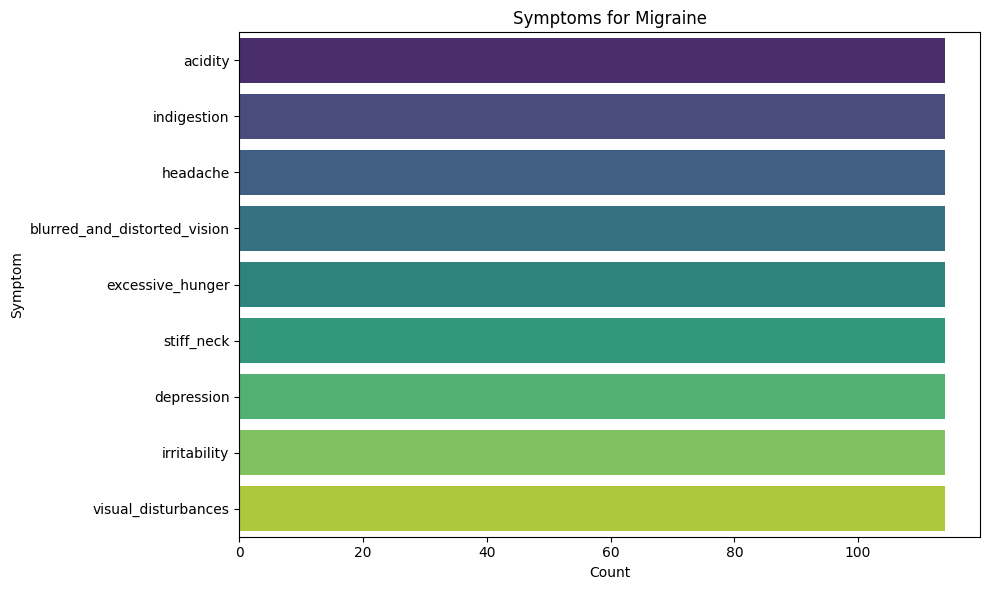

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


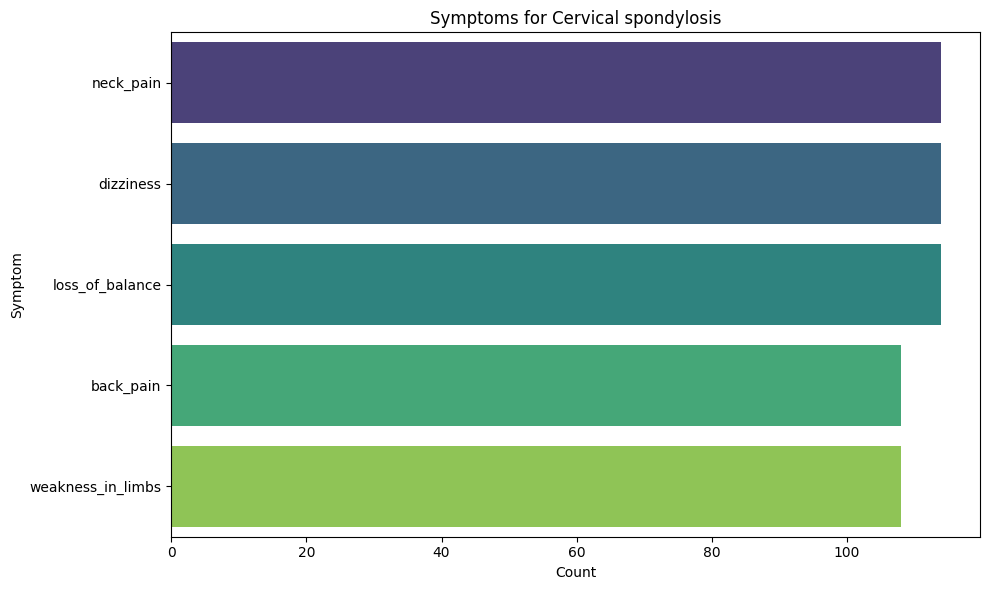

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


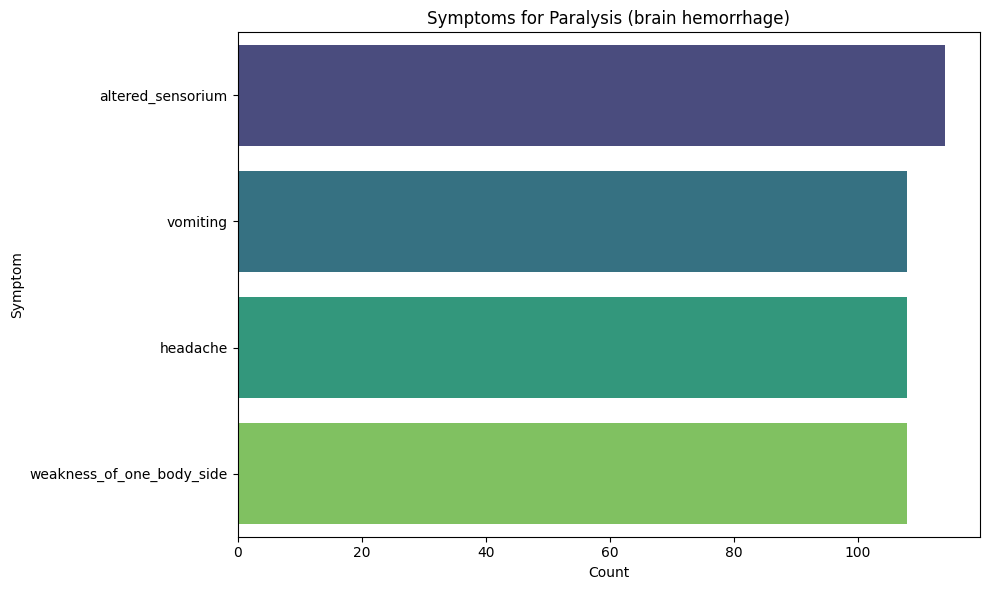

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


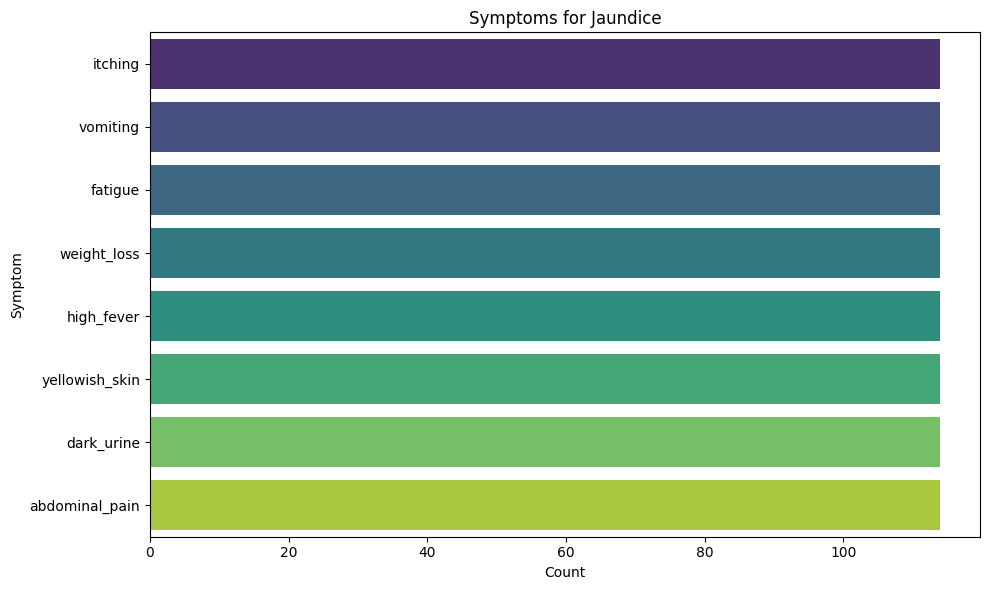

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


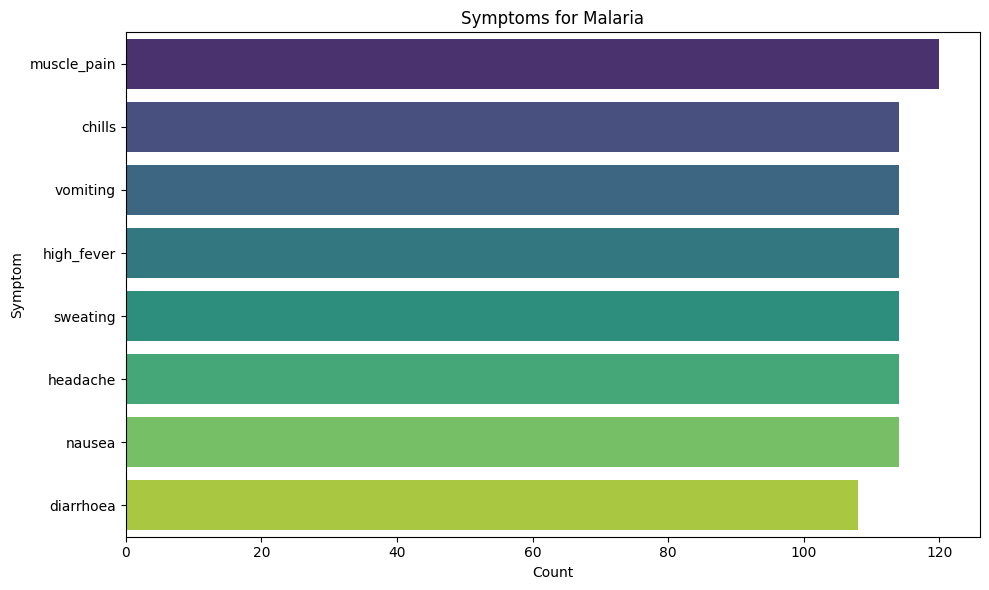

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


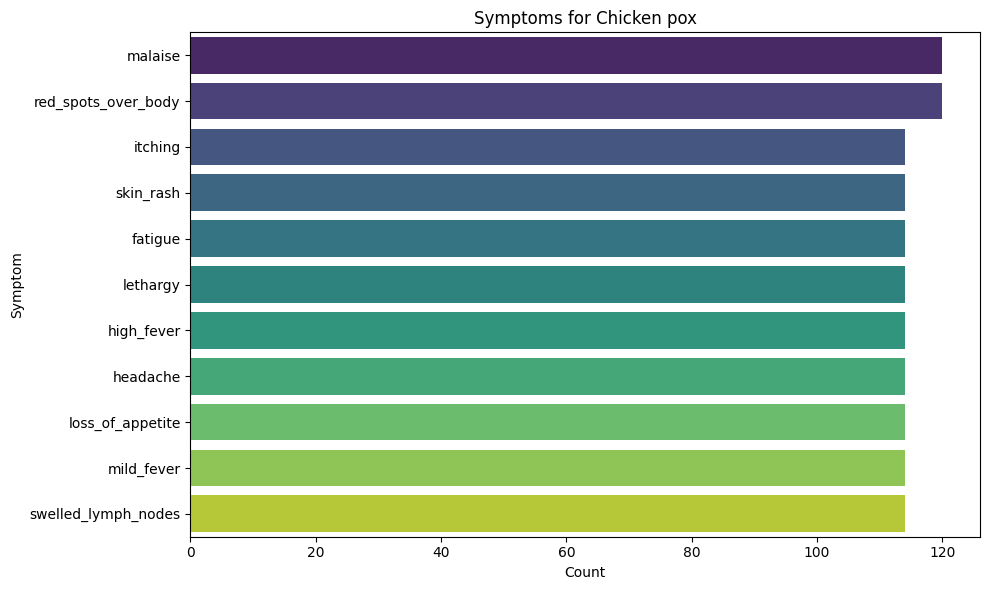

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


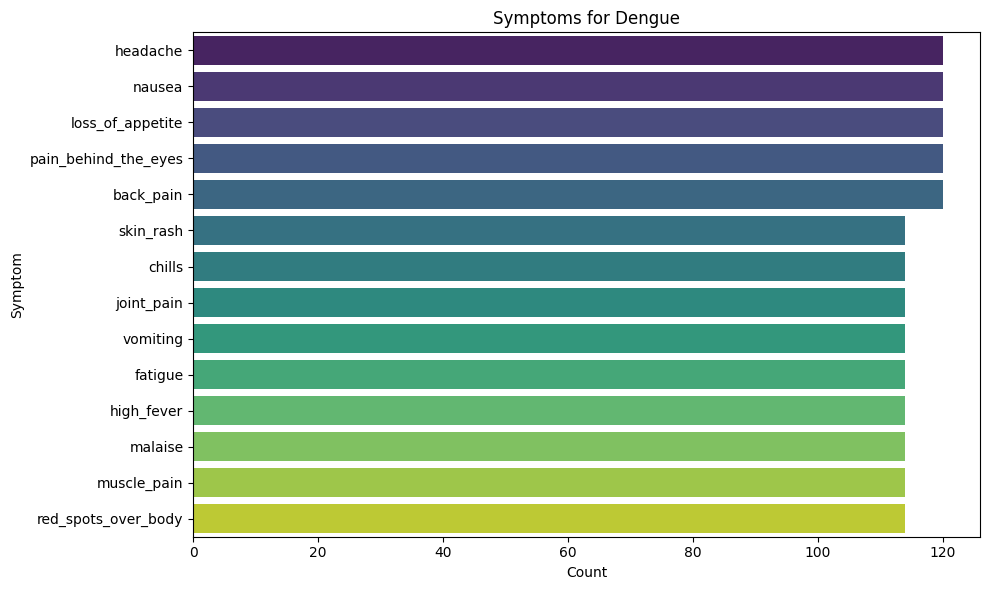

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


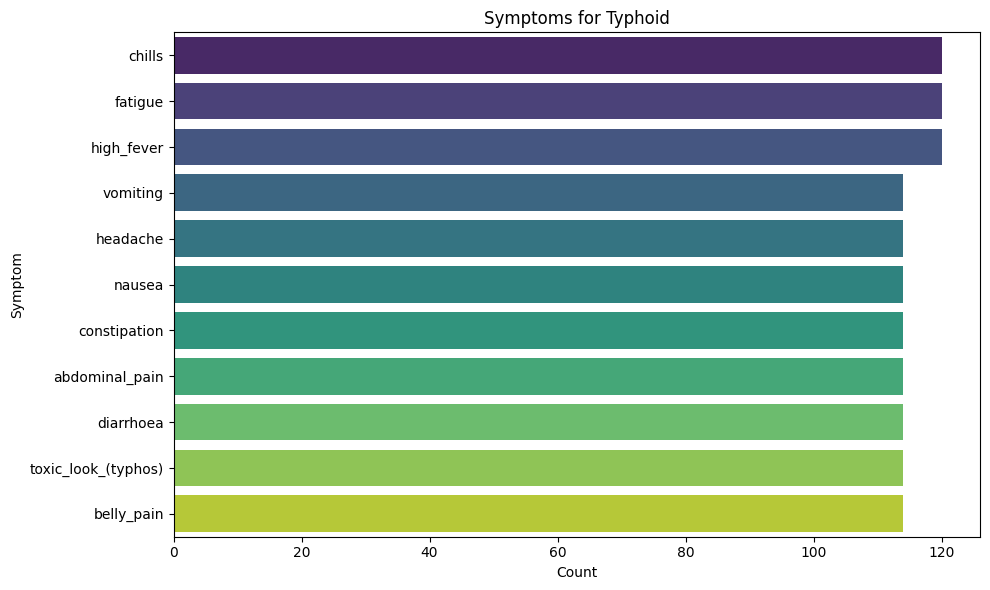

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


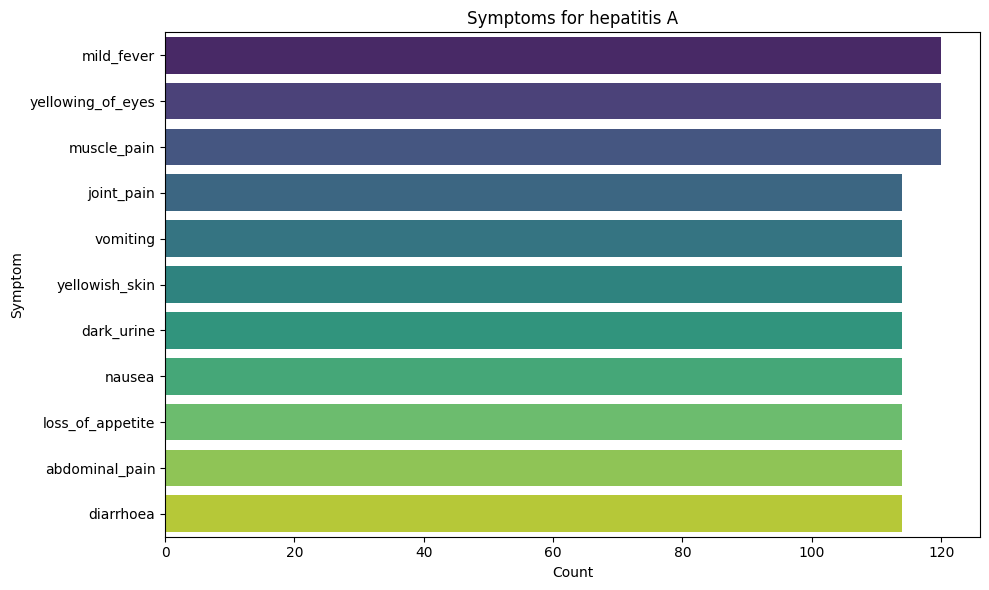

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


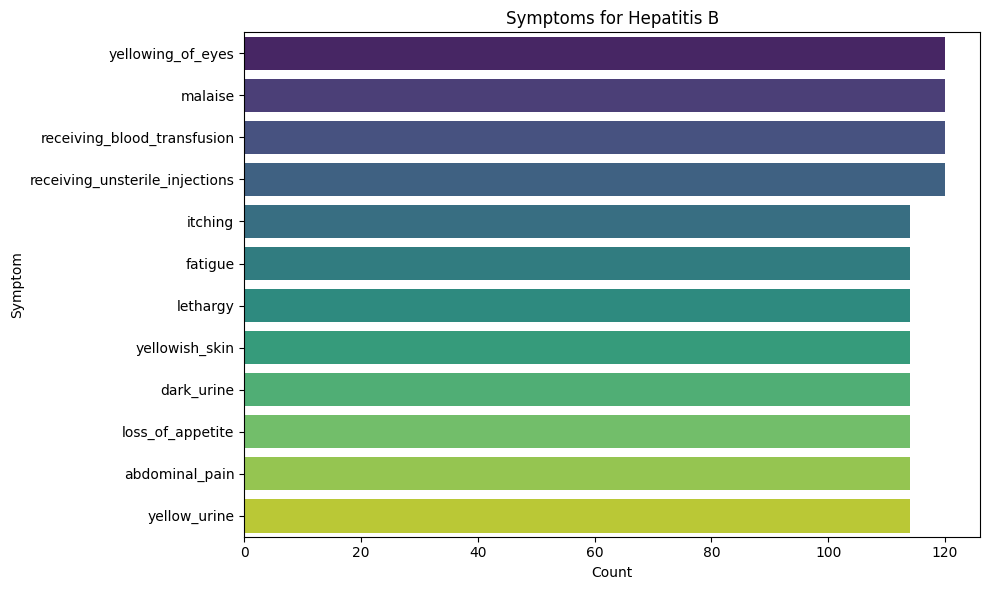

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


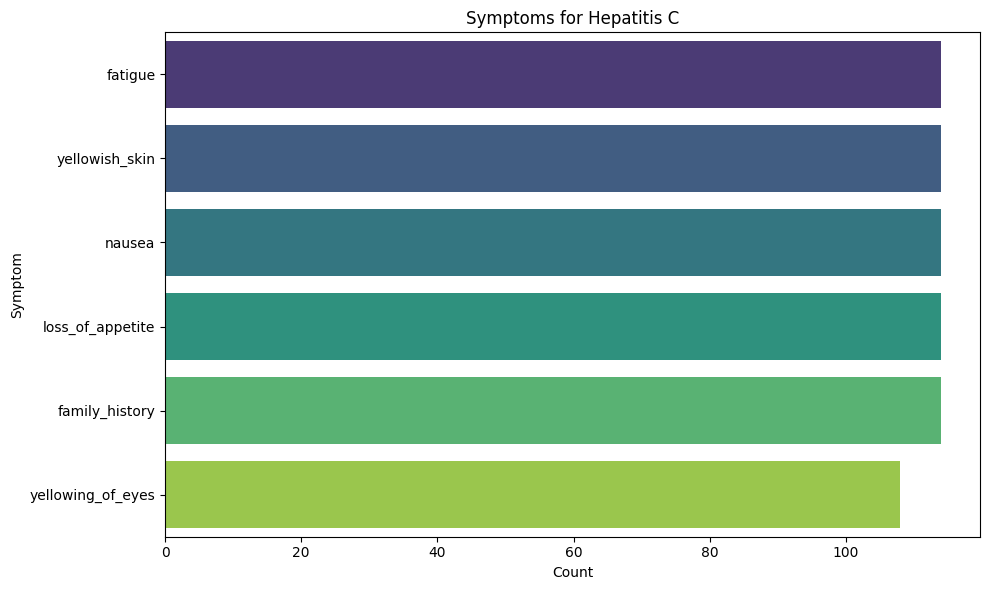

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


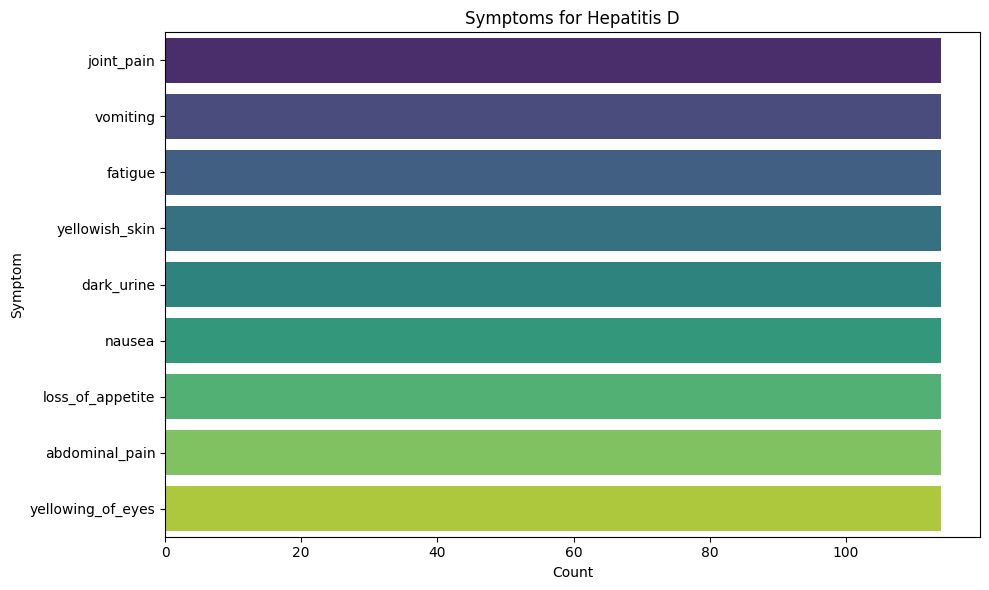

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


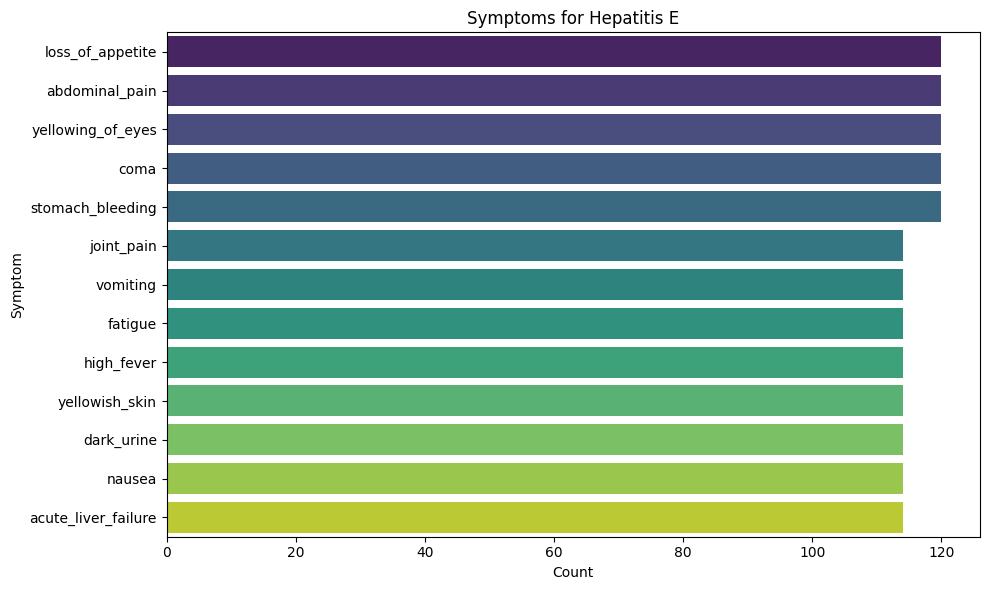

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


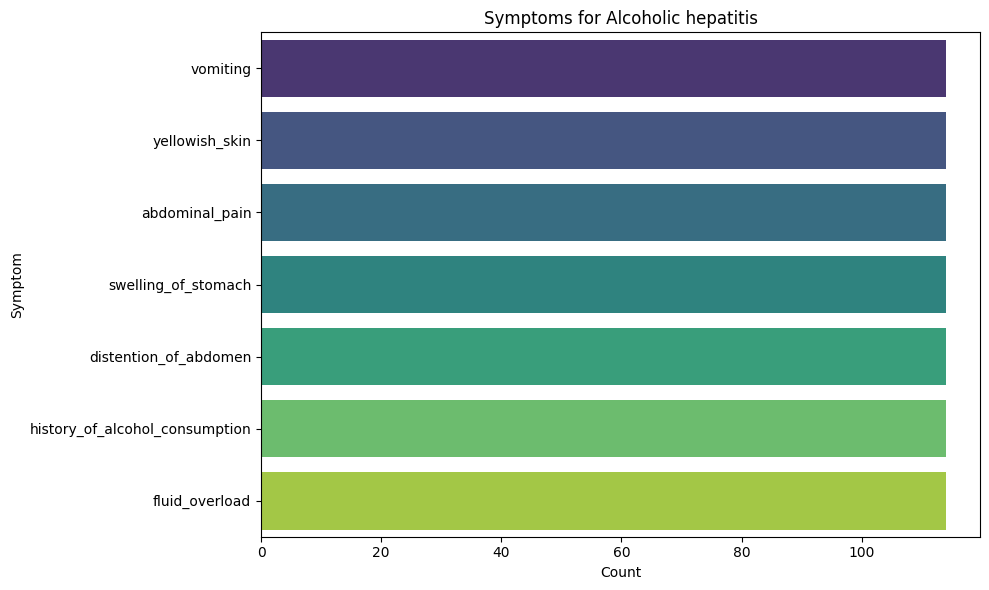

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


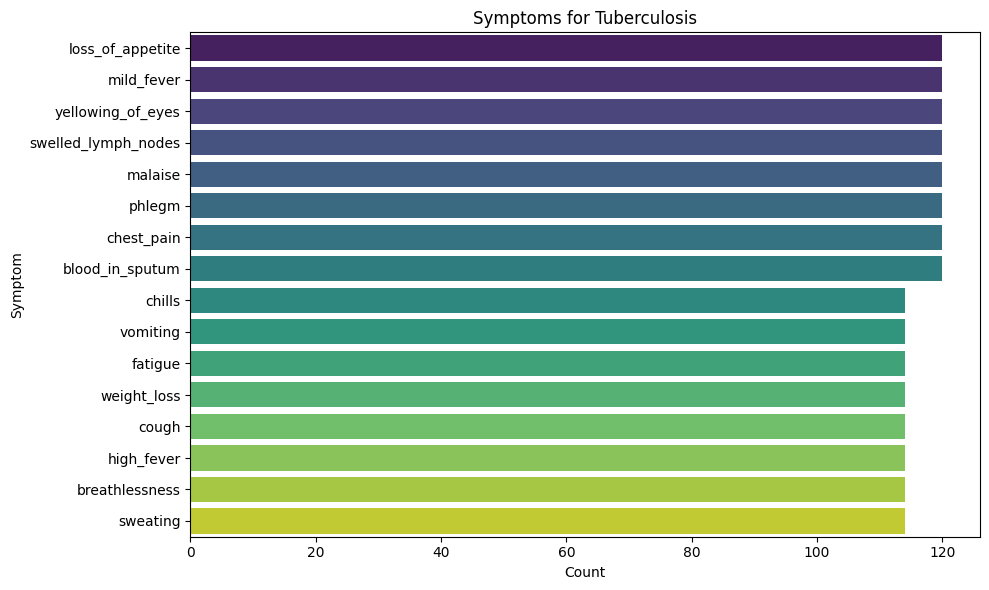

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


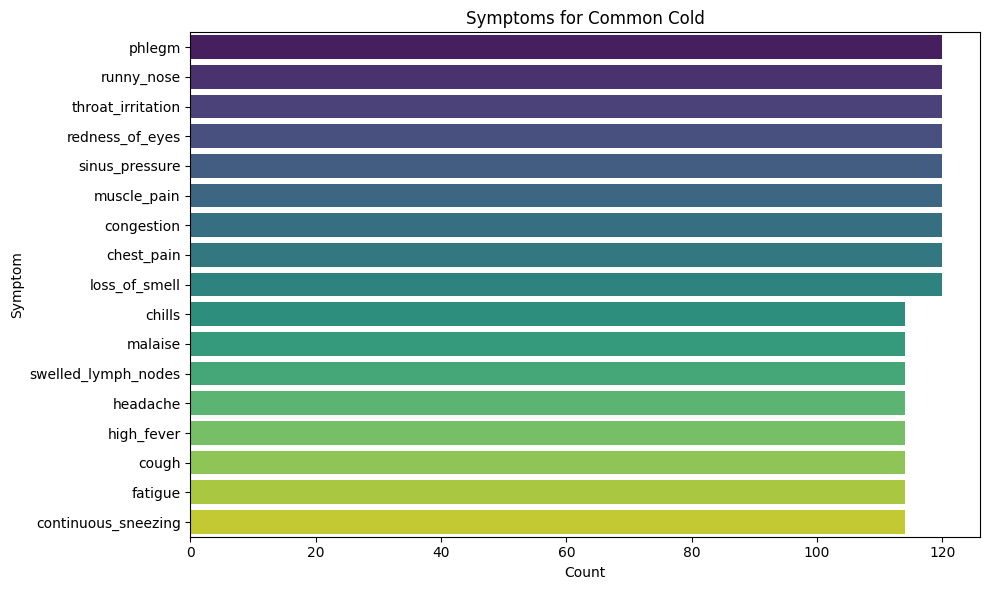

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


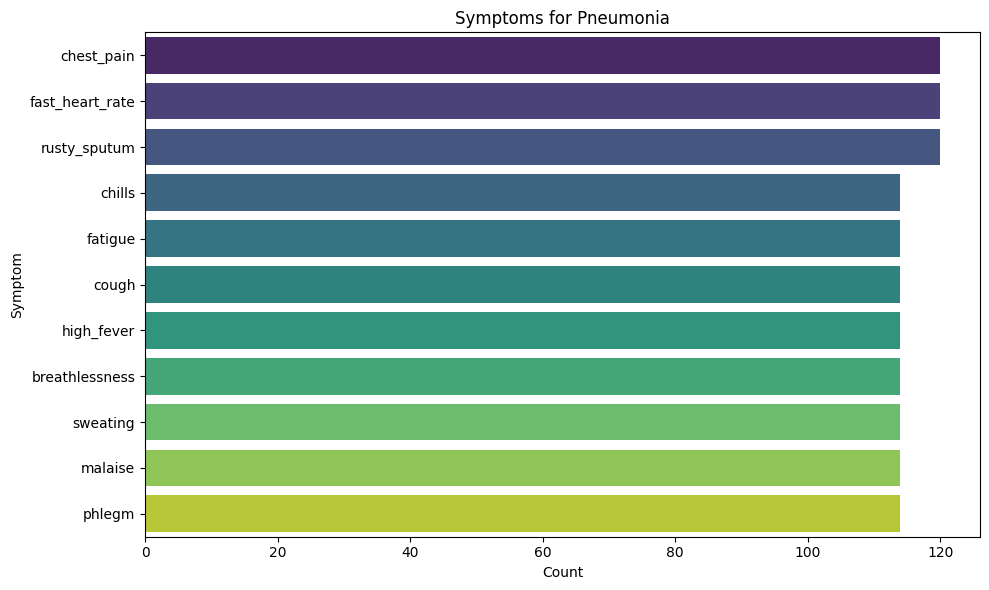

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


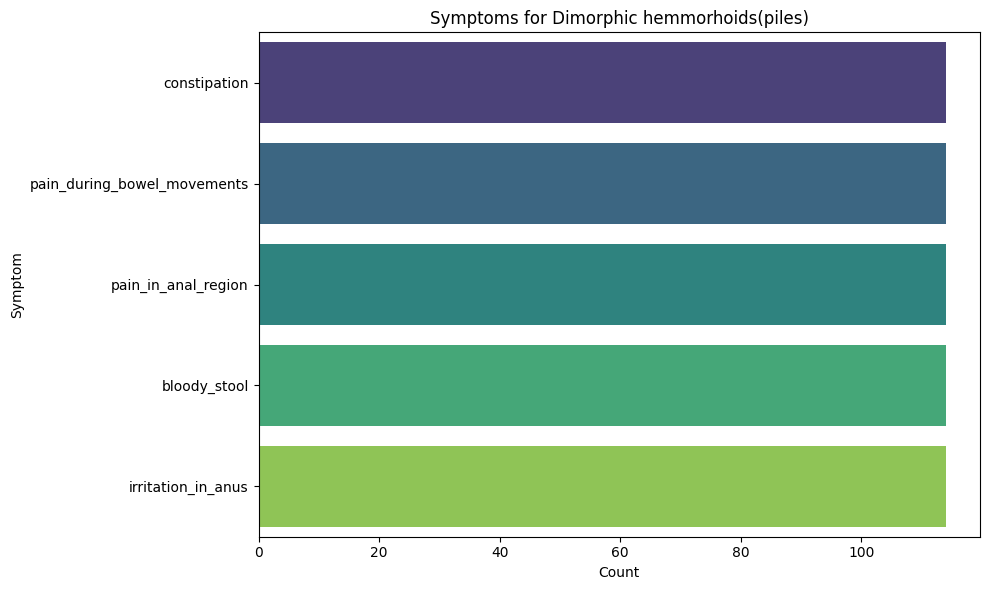

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


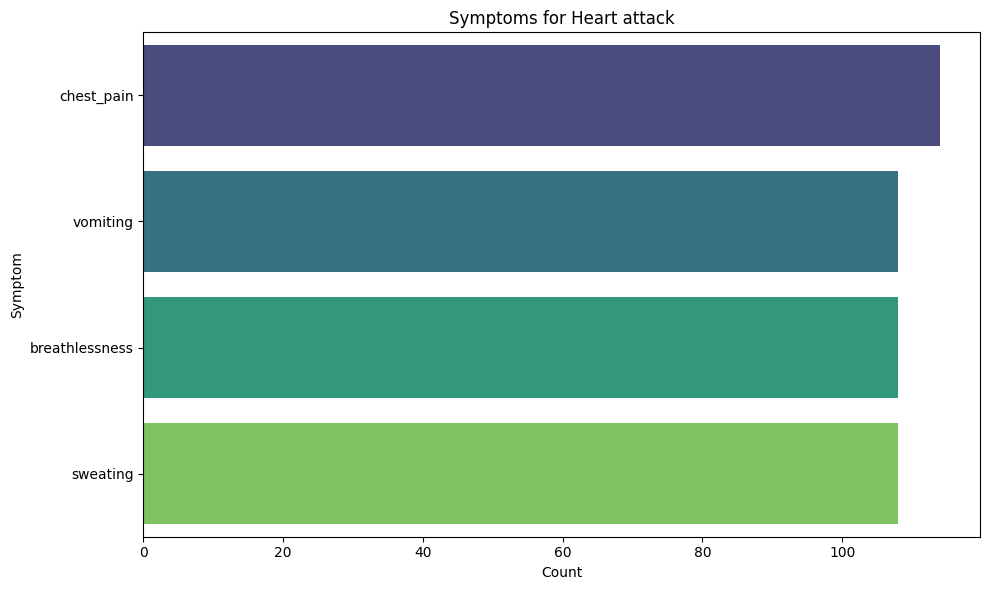

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


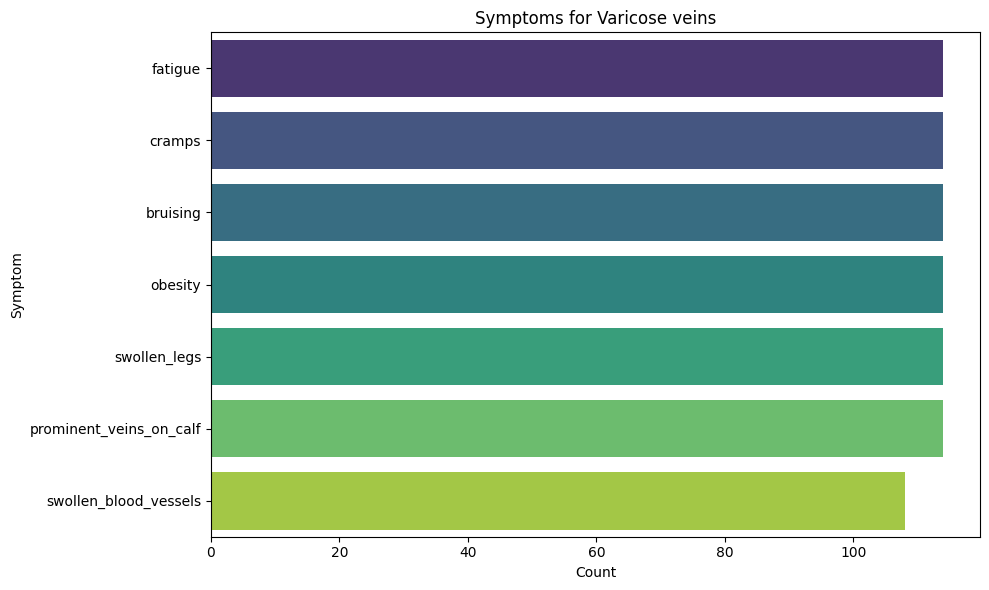

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


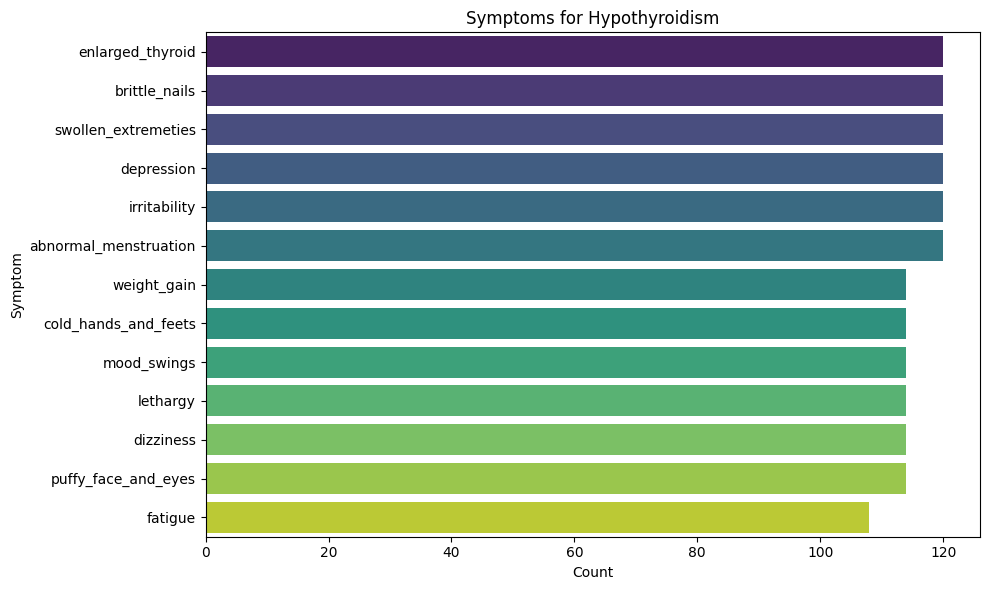

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


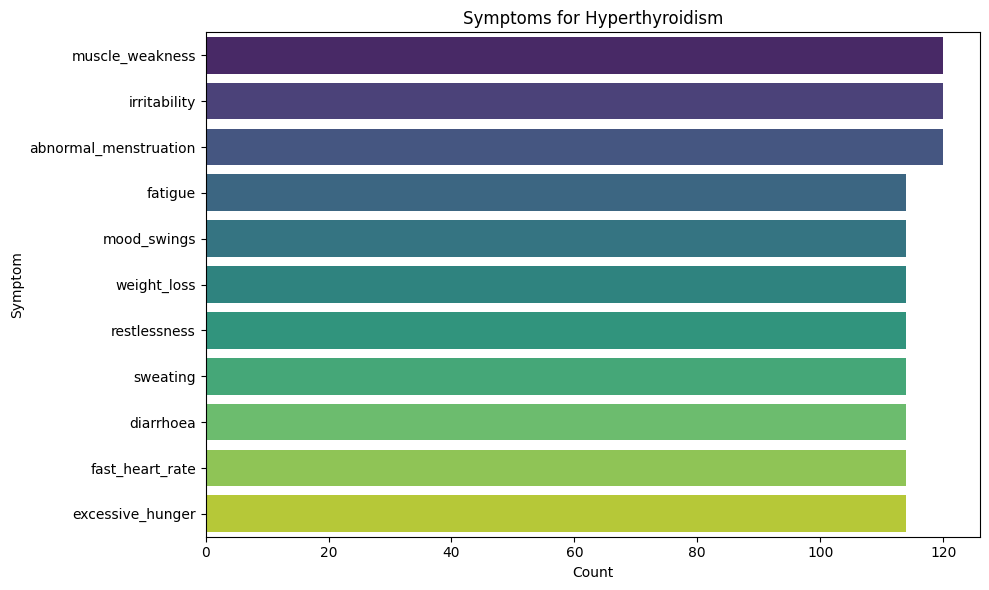

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


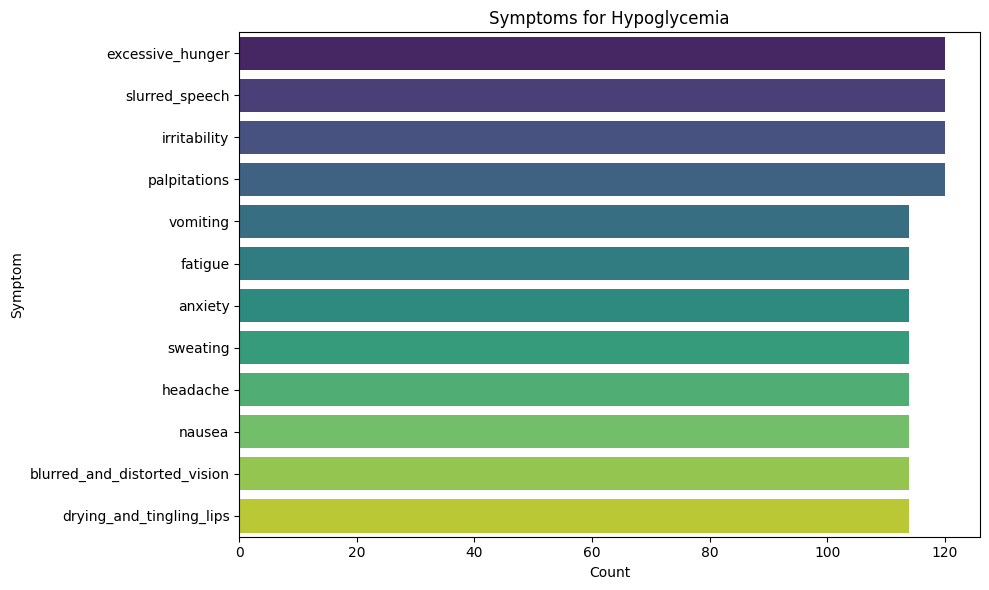

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


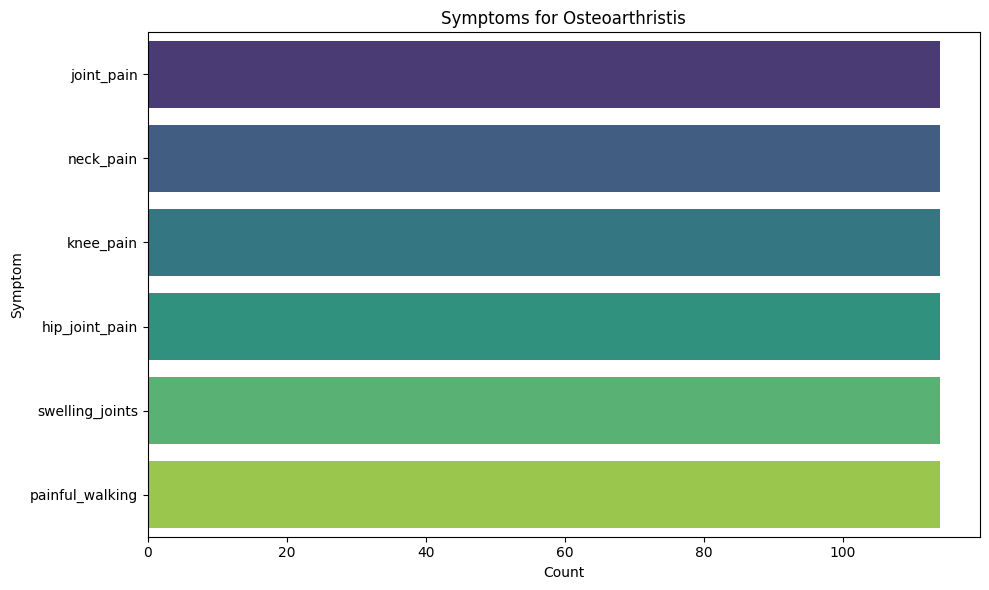

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


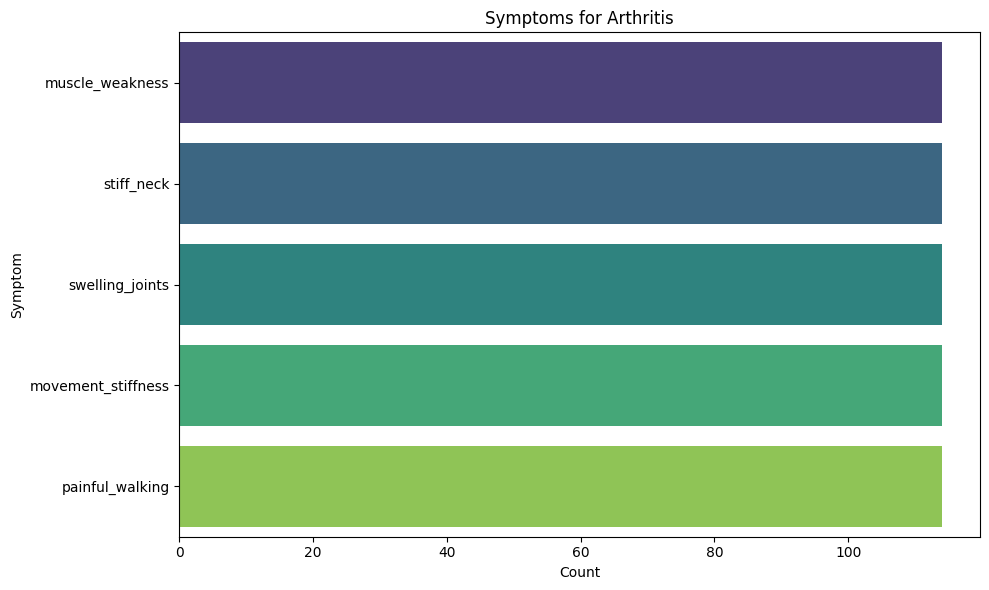

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


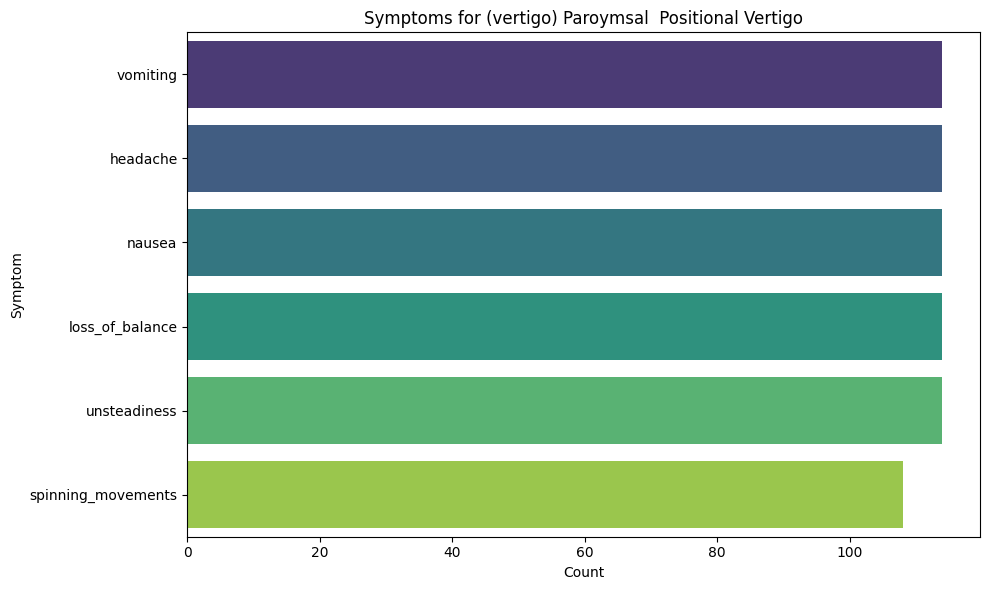

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


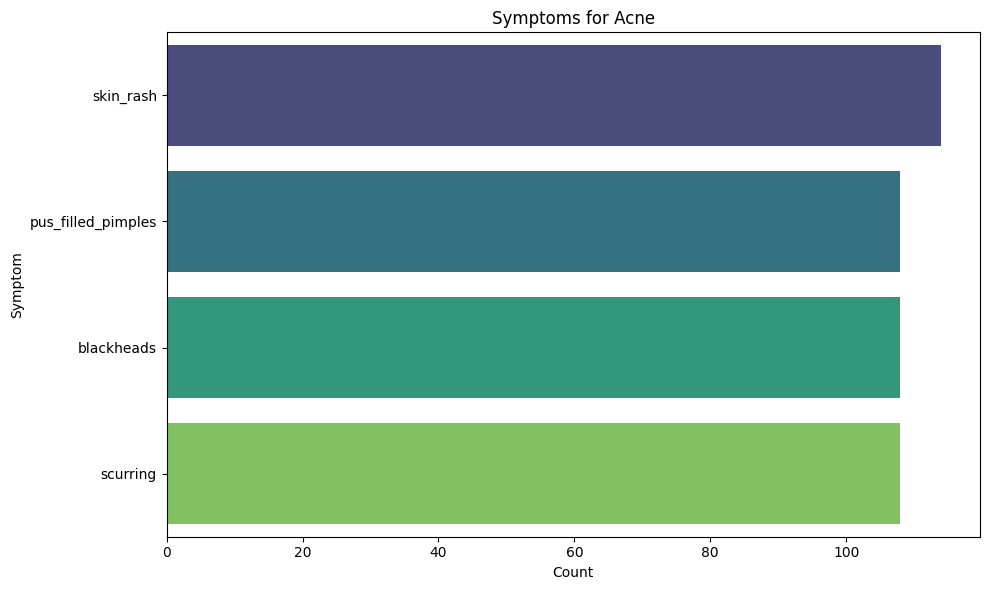

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


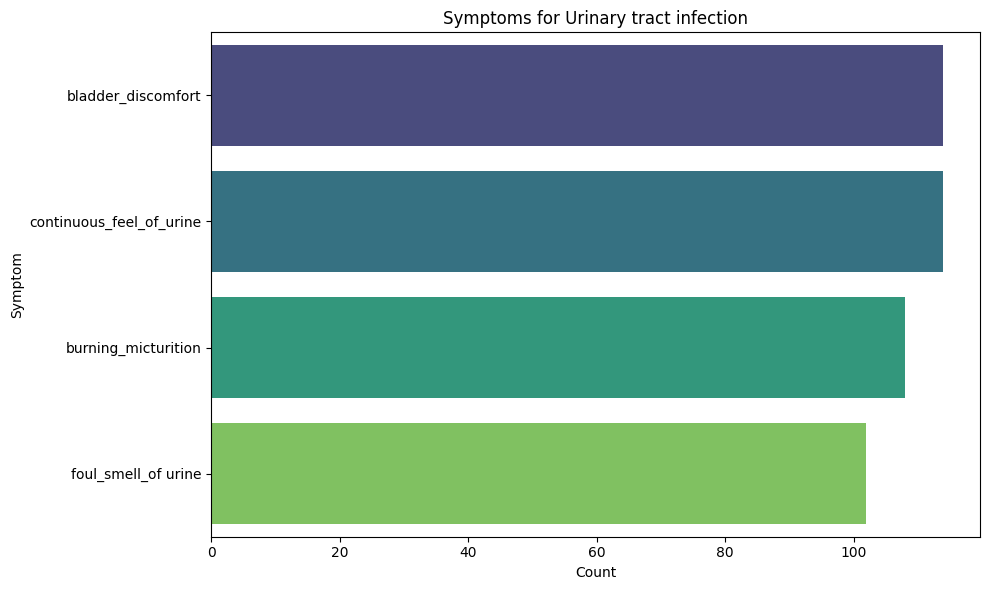

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


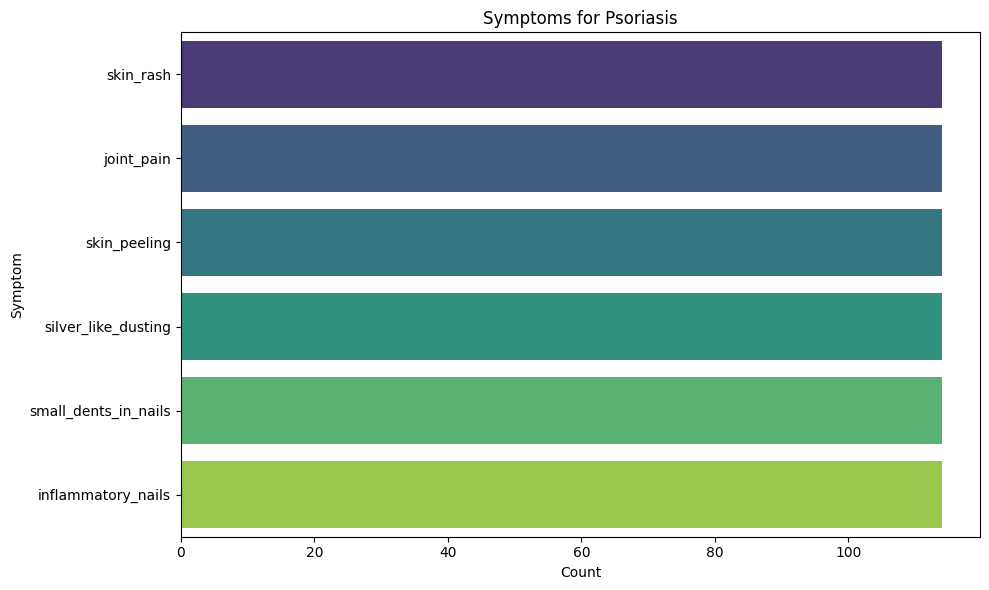

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


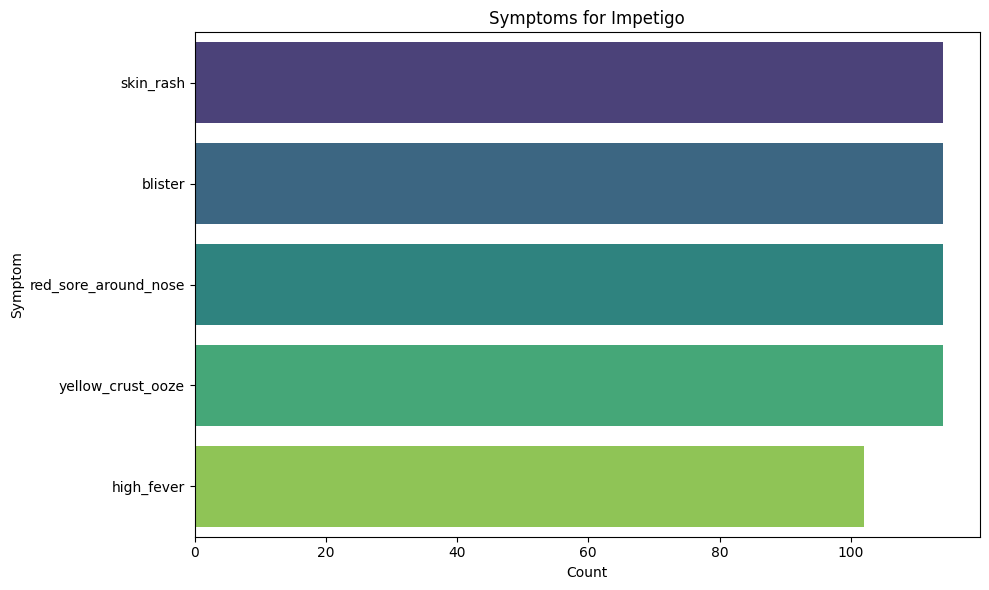

In [21]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('dataset.csv')

# Mendapatkan nama penyakit unik
unique_diseases = df['Disease'].unique()

# Mengidentifikasi kolom gejala
symptom_columns = [col for col in df.columns if 'Symptom' in col]

# Melakukan perulangan untuk setiap penyakit unik dan membuat plot
for disease_name in unique_diseases:
    # Memfilter data untuk penyakit saat ini
    disease_df = df[df['Disease'] == disease_name]

    # Mengubah DataFrame untuk mengubah kolom gejala menjadi baris
    # Menghilangkan baris di mana 'value' (gejala) adalah NaN setelah diubah.
    disease_symptoms = disease_df[symptom_columns].melt(var_name='Symptom_Column', value_name='Symptom_Name').dropna(subset=['Symptom_Name'])

    # Menghitung kemunculan setiap gejala
    symptom_counts = disease_symptoms['Symptom_Name'].value_counts().reset_index()
    symptom_counts.columns = ['Symptom', 'Count']

    # Mengurutkan untuk visualisasi yang lebih baik
    symptom_counts = symptom_counts.sort_values(by='Count', ascending=False)

    # Membuat plot bar untuk gejala penyakit saat ini
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')
    plt.title(f'Symptoms for {disease_name}')
    plt.xlabel('Count')
    plt.ylabel('Symptom')
    plt.tight_layout()
    plt.show()

# Merge dataset symptom_precaution dan symptom_desc

In [22]:
symptom_precaution['Disease'] = symptom_precaution['Disease'].str.strip().str.lower()
symptom_desc['Disease'] = symptom_desc['Disease'].str.strip().str.lower()

df_combined = symptom_desc.merge(symptom_precaution, on='Disease', how='outer')

df_combined.head()

,Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,(vertigo) paroymsal positional vertigo,Benign paroxysmal positional vertigo (BPPV) is...,lie down,avoid sudden change in body,avoid abrupt head movment,relax
1,acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
2,aids,Acquired immunodeficiency syndrome (AIDS) is a...,avoid open cuts,wear ppe if possible,consult doctor,follow up
3,alcoholic hepatitis,"Alcoholic hepatitis is a diseased, inflammator...",stop alcohol consumption,consult doctor,medication,follow up
4,allergy,An allergy is an immune system response to a f...,apply calamine,cover area with bandage,NaN,use ice to compress itching


# # DROP COLUMN

In [23]:
df.drop(['Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'], inplace=True,axis=1)

In [24]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
dtypes: object(12)
memory usage: 461.4+ KB


In [26]:
#fill missing values pake "Unknown"

kolom = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']
for i in kolom:
    df[i].fillna('Unknown', inplace=True)

C:\Users\redst\AppData\Local\Temp\ipykernel_10128\4164226783.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('Unknown', inplace=True)


In [27]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,Fungal infection,itching,skin_rash,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [28]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '_')

def calculate_weighted_symptoms(row):
    symptoms = [s for s in row[symptom_cols] if pd.notna(s) and s != 'nan']
    weights = symptom_severity.set_index('symptom').to_dict()['weight']
    return sum(weights.get(symptom, 0) for symptom in symptoms)

df['severity_score'] = df.apply(calculate_weighted_symptoms, axis=1)

df[['Disease', 'severity_score']].head()

,Disease,severity_score
0,Fungal infection,14
1,Fungal infection,13
2,Fungal infection,11
3,Fungal infection,10
4,Fungal infection,8


C:\Users\redst\AppData\Local\Temp\ipykernel_10128\882054483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')


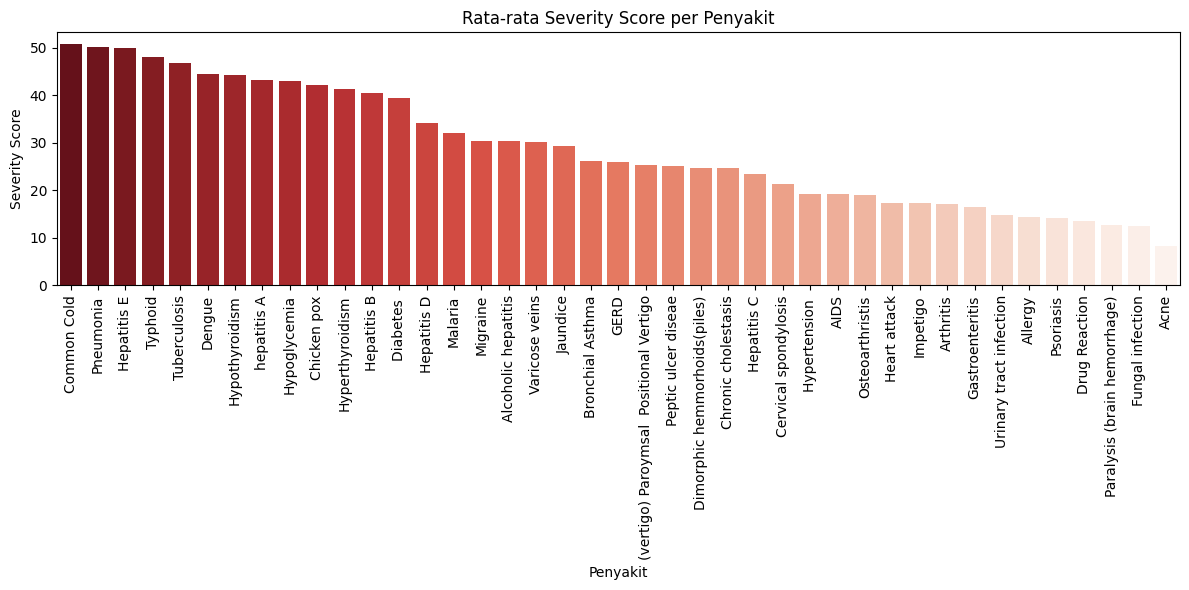

In [29]:
severity_by_disease = df.groupby('Disease')['severity_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')

plt.xticks(rotation=90)
plt.title('Rata-rata Severity Score per Penyakit')
plt.xlabel('Penyakit')
plt.ylabel('Severity Score')
plt.tight_layout()

plt.show()

# # ENCODING 

In [30]:
#Encoding variabel target 'Disease' untuk klasifikasi
from sklearn.preprocessing import LabelEncoder

disease_encoder = LabelEncoder()
df['Disease_encoded'] = disease_encoder.fit_transform(df['Disease'])
disease_labels = list(disease_encoder.classes_) # Save class labels for decoding predictions

In [31]:
#Encoding features gejala 'Symptom' pake MultiLabelBinarizer
symptom_lists_for_mlb = []
for index, row in df.iterrows():
    row_symptoms = [s for s in row[kolom] if s != 'Unknown']
    symptom_lists_for_mlb.append(row_symptoms)

mlb = MultiLabelBinarizer()
symptom_binary_features = mlb.fit_transform(symptom_lists_for_mlb)

In [32]:
#Membuat dataframe binary baru untuk fitur gejala
symptom_binary_df = pd.DataFrame(symptom_binary_features, columns=mlb.classes_)
print(f"\nShape of symptom binary features: {symptom_binary_df.shape}")
print("Sample binary symptom features:")
print(symptom_binary_df.head())


Shape of symptom binary features: (4920, 127)
Sample binary symptom features:
   abdominal_pain  abnormal_menstruation  acidity  acute_liver_failure  \
0               0                      0        0                    0   
1               0                      0        0                    0   
2               0                      0        0                    0   
3               0                      0        0                    0   
4               0                      0        0                    0   

   altered_sensorium  anxiety  back_pain  belly_pain  blackheads  \
0                  0        0          0           0           0   
1                  0        0          0           0           0   
2                  0        0          0           0           0   
3                  0        0          0           0           0   
4                  0        0          0           0           0   

   bladder_discomfort  ...  vomiting  watering_from_eyes  weakness_

In [33]:
# Handling Severity Score (Discretization for Bernoulli NB)
# Calculate thresholds based on the severity_score
severity_q1_threshold = df['severity_score'].quantile(0.33) if not df['severity_score'].empty and df['severity_score'].sum() > 0 and df['severity_score'].nunique() > 1 else (df['severity_score'].max() / 3 if df['severity_score'].max() > 0 else 1)
severity_q2_threshold = df['severity_score'].quantile(0.66) if not df['severity_score'].empty and df['severity_score'].sum() > 0 and df['severity_score'].nunique() > 1 else (2 * df['severity_score'].max() / 3 if df['severity_score'].max() > 0 else 2)

def is_high_severity(score, q2):
    return 1 if score > q2 else 0

In [34]:
# Create a binary feature for high severity
df['is_high_severity'] = df['severity_score'].apply(lambda score: is_high_severity(score, severity_q2_threshold))
print("\nSample 'is_high_severity' feature:")
print(df['is_high_severity'].head())


Sample 'is_high_severity' feature:
0    0
1    0
2    0
3    0
4    0
Name: is_high_severity, dtype: int64


Text(0.5, 1.0, 'Clustering Gejala berdasarkan Pola Kemunculan')

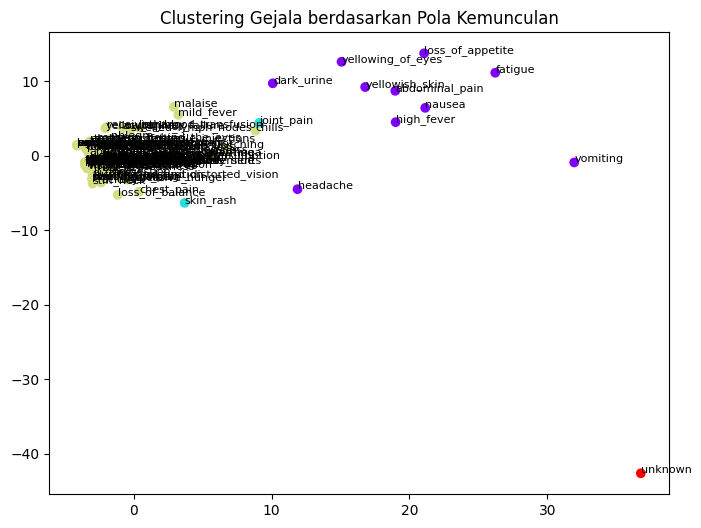

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

symptom_matrix = symptom_binary_df.T
k = 4  # misalnya ingin 4 kelompok gejala
kmeans = KMeans(n_clusters=k, random_state=42)
gejala_cluster = kmeans.fit_predict(symptom_matrix)


similarity_matrix = cosine_similarity(symptom_matrix)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(symptom_matrix)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=gejala_cluster, cmap='rainbow')
for i, gejala in enumerate(symptom_matrix.index):
    plt.text(X_pca[i,0]+0.01, X_pca[i,1]+0.01, gejala, fontsize=8)
plt.title("Clustering Gejala berdasarkan Pola Kemunculan")

# # MODELING

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
# KMeans Clustering
# Cluster based on binary symptoms only
# penjelasan: Baris ini mendefinisikan variabel `X_cluster_features`.
# *   Variabel ini disiapkan untuk menyimpan fitur-fitur yang akan menjadi input bagi algoritma K-Means.
# *   Pada baris ini, kita membuat salinan (`.copy()`) dari DataFrame `symptom_binary_df`.
# *   DataFrame `symptom_binary_df` berisi representasi biner (0 atau 1) dari semua gejala unik, yang dihasilkan oleh `MultiLabelBinarizer`.
# *   **Tujuannya adalah untuk melakukan clustering hanya berdasarkan pola gejala biner yang dimiliki oleh setiap pasien.**
X_cluster_features = symptom_binary_df.copy()


In [38]:
X_cluster_features = symptom_binary_df.copy()
X_cluster_features['severity_score'] = df['severity_score']

# penjelasan: 
# *   Baris komentar pertama menjelaskan pilihan mana yang diambil. Dinyatakan bahwa kode akan "stick with clustering on binary symptoms + continuous severity". Ini berarti pilihan untuk hanya menggunakan gejala biner (Option 2) **tidak jadi digunakan**, meskipun kodenya ada di atasnya.
# *   Baris `X_cluster_features = symptom_binary_df.copy()` kembali membuat salinan dari DataFrame gejala biner. Ini seperti memulai dari awal untuk kumpulan fitur klaster.
# *   Baris `X_cluster_features['severity_score'] = df['severity_score']` menambahkan kolom 'severity_score' dari DataFrame `df` ke dalam `X_cluster_features`.
# *   Kolom 'severity_score' ini adalah nilai numerik kontinu yang dihitung sebelumnya berdasarkan bobot gejala.
# *   **Tujuan dari implementasi akhir ini adalah untuk melakukan klastering berdasarkan kombinasi pola gejala biner *ditambah* skor keparahan (severity score) yang kontinu.**

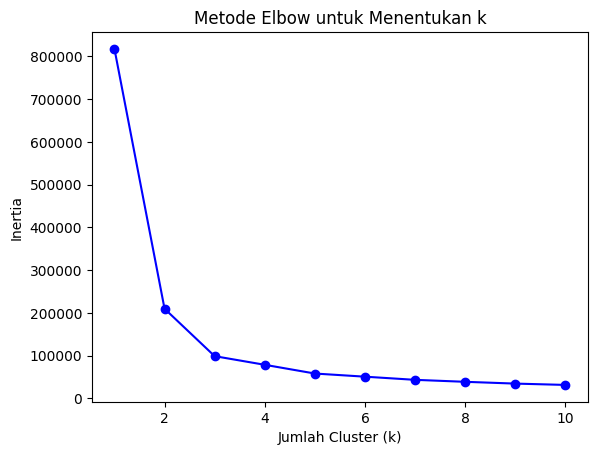

In [39]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init
clusters = kmeans.fit_predict(X_cluster_features)

df['cluster'] = clusters
print(df['cluster'].head())

0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int32


In [41]:
# Handling Cluster (feature biner ture untuk Bernoulli NB)
# Diasumsikan KMeans menetapkan klaster 0 dan 1
df['is_cluster_1'] = df['cluster'].apply(lambda c: 1 if c == 1 else 0)
print("\nSample 'is_cluster_1' feature:")
print(df['is_cluster_1'].head())


Sample 'is_cluster_1' feature:
0    1
1    1
2    1
3    1
4    1
Name: is_cluster_1, dtype: int64


In [42]:
# --- Combine all features for the Bernoulli NB model ---
# Drop original Disease, Symptom columns, severity_score, and original cluster column
# Keep the original index to join with symptom_binary_df
df = df.drop(columns=['Disease'] + kolom + ['severity_score', 'cluster'], errors='ignore')

In [43]:
# Join with the symptom binary features DataFrame
# Ensure both DataFrames have the same index before joining
df.reset_index(drop=True, inplace=True)
symptom_binary_df.reset_index(drop=True, inplace=True)

X_bnb = df.join(symptom_binary_df) # Join df (containing is_high_severity, is_cluster_1) with symptom_binary_df


In [44]:
# Define the target variable using the encoded column
y_bnb = df['Disease_encoded']

In [45]:
# Drop the encoded disease column from X_bnb as it's the target
X_bnb.drop(columns=['Disease_encoded'], inplace=True, errors='ignore')

In [46]:
print("\nFinal features DataFrame (X_bnb) for Bernoulli NB:")
print(X_bnb.head())
print(f"Shape of X_bnb: {X_bnb.shape}")
print(f"Shape of y_bnb: {y_bnb.shape}")


Final features DataFrame (X_bnb) for Bernoulli NB:
   is_high_severity  is_cluster_1  abdominal_pain  abnormal_menstruation  \
0                 0             1               0                      0   
1                 0             1               0                      0   
2                 0             1               0                      0   
3                 0             1               0                      0   
4                 0             1               0                      0   

   acidity  acute_liver_failure  altered_sensorium  anxiety  back_pain  \
0        0                    0                  0        0          0   
1        0                    0                  0        0          0   
2        0                    0                  0        0          0   
3        0                    0                  0        0          0   
4        0                    0                  0        0          0   

   belly_pain  ...  vomiting  watering_from_ey

# # MODELING KLASIFIKASI NAIVE BAYES (BERNOULLI)

In [47]:
from sklearn.naive_bayes import BernoulliNB # Using BernoulliNB
from imblearn.over_sampling import SMOTE # For handling imbalance (use with caution on binary data)

# Ensure y_bnb is suitable for stratification
unique_classes_bnb, counts_bnb = np.unique(y_bnb, return_counts=True)
if len(unique_classes_bnb) > 1 and all(c > 1 for c in counts_bnb):
     stratify_y_bnb = y_bnb
else:
     stratify_y_bnb = None # Cannot stratify


In [48]:
#Split dataset
X_train_bnb, X_test_bnb, y_train_bnb, y_test_bnb = train_test_split(
    X_bnb, y_bnb, test_size=0.3, random_state=42, stratify=stratify_y_bnb
)

In [49]:
print(f"\nShape of X_train_bnb: {X_train_bnb.shape}")
print(f"Shape of y_train_bnb: {y_train_bnb.shape}")
print(f"Shape of X_test_bnb: {X_test_bnb.shape}")
print(f"Shape of y_test_bnb: {y_test_bnb.shape}")


Shape of X_train_bnb: (3444, 129)
Shape of y_train_bnb: (3444,)
Shape of X_test_bnb: (1476, 129)
Shape of y_test_bnb: (1476,)


In [50]:
# Buat handle imbalance dengan SMOTE
print(pd.Series(y_train_bnb).value_counts())


Disease_encoded
16    84
21    84
36    84
3     84
20    84
15    84
33    84
22    84
30    84
7     84
26    84
39    84
25    84
10    84
2     84
12    84
24    84
32    84
14    84
31    84
35    84
34    84
29    84
40    84
11    84
0     84
8     84
18    84
17    84
13    84
4     84
1     84
23    84
6     84
28    84
9     84
27    84
5     84
37    84
19    84
38    84
Name: count, dtype: int64


In [51]:
smote = SMOTE(random_state=42)
X_train_bnb_resampled, y_train_bnb_resampled = smote.fit_resample(X_train_bnb, y_train_bnb)

In [52]:
print(pd.Series(y_train_bnb_resampled).value_counts())

Disease_encoded
16    84
21    84
36    84
3     84
20    84
15    84
33    84
22    84
30    84
7     84
26    84
39    84
25    84
10    84
2     84
12    84
24    84
32    84
14    84
31    84
35    84
34    84
29    84
40    84
11    84
0     84
8     84
18    84
17    84
13    84
4     84
1     84
23    84
6     84
28    84
9     84
27    84
5     84
37    84
19    84
38    84
Name: count, dtype: int64


In [53]:
# Training Bernoulli Naive Bayes model
model = BernoulliNB()
model.fit(X_train_bnb_resampled, y_train_bnb_resampled)

BernoulliNB()

# # EVALUASI MODEL

In [54]:
# Predict dan proba
y_pred_bnb = model.predict(X_test_bnb)
y_prob_bnb = model.predict_proba(X_test_bnb)


In [55]:
# Evaluasi performance model
# Accuracy
accuracy = accuracy_score(y_test_bnb, y_pred_bnb)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 1.00


In [56]:
# Classification Report
class_report = classification_report(y_test_bnb, y_pred_bnb, target_names=disease_labels, zero_division=0)
print('\nLaporan Klasifikasi:')
print(class_report)


Laporan Klasifikasi:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        36
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Common Cold       1.00      1.00      1.00        36
     

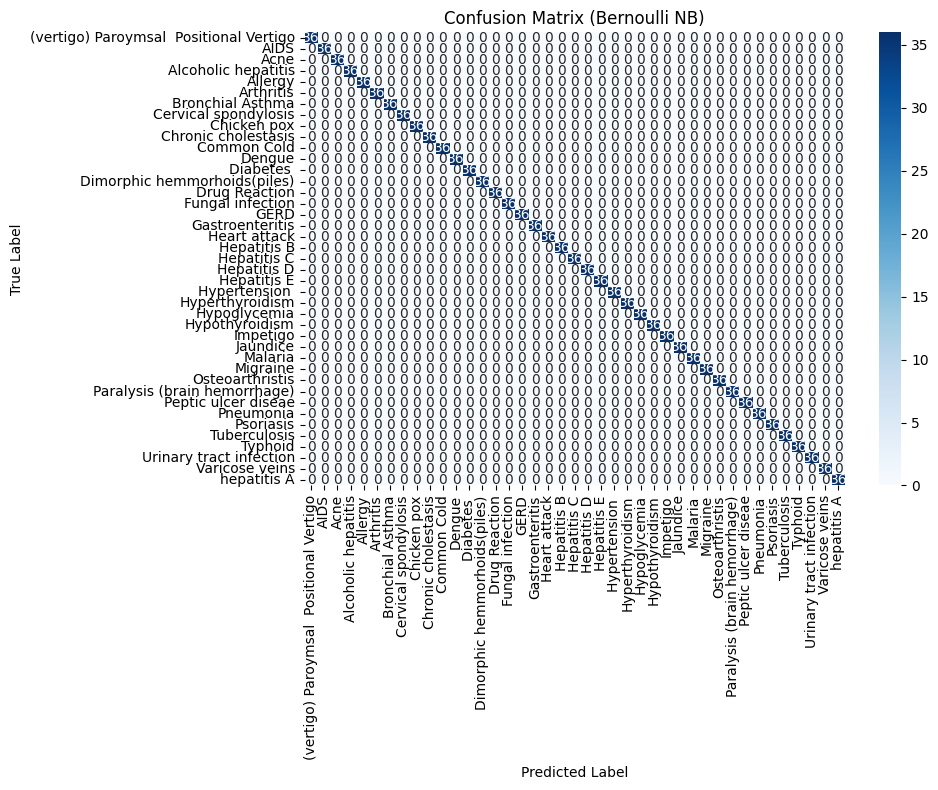

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix
cm = confusion_matrix(y_test_bnb, y_pred_bnb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=disease_labels, yticklabels=disease_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Bernoulli NB)')
plt.tight_layout()
plt.show()


Akurasi Training: 1.00
Akurasi Test: 1.00

Model tidak menunjukkan indikasi overfitting yang signifikan


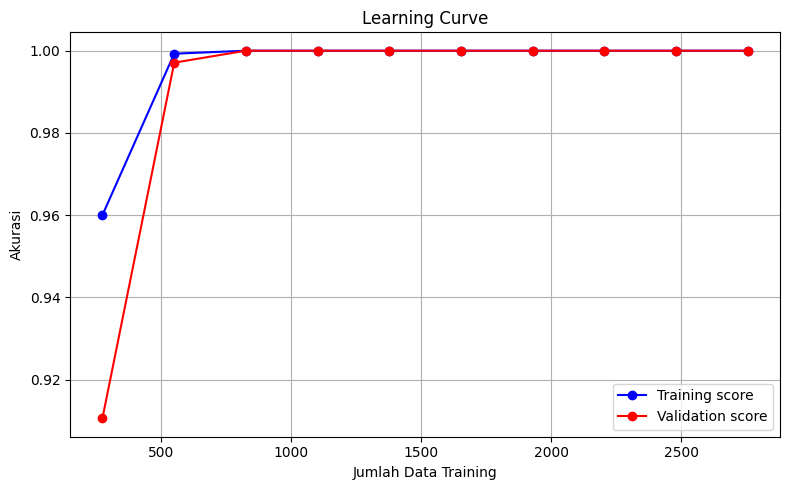

In [58]:
#Cek overfitting
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred_bnb = model.predict(X_train_bnb_resampled) # Use resampled training data
train_acc = accuracy_score(y_train_bnb_resampled, y_train_pred_bnb)
print(f"\nAkurasi Training: {train_acc:.2f}")

# Test accuracy
test_acc = accuracy_score(y_test_bnb, y_pred_bnb) # Use original test data
print(f"Akurasi Test: {test_acc:.2f}")

# Indikasi overfitting
if train_acc - test_acc > 0.1:
    print("\nModel kemungkinan overfitting (selisih akurasi > 0.1)")
else:
    print("\nModel tidak menunjukkan indikasi overfitting yang signifikan")


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_bnb_resampled, y_train_bnb_resampled, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Akurasi')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


if len(X_cluster_features) > 1 and len(np.unique(clusters)) > 1:
    silhouette_avg = silhouette_score(X_cluster_features, clusters)
    print(f"\nSilhouette Score: {silhouette_avg:.4f}")
else:
    print("\nCannot calculate Silhouette Score: Not enough samples or clusters.")


if len(np.unique(clusters)) > 1:
    try:
        dbi = davies_bouldin_score(X_cluster_features, clusters)
        print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
    except ValueError as e:
        print(f"Cannot calculate Davies-Bouldin Index (DBI): {e}")
else:
    print("\nCannot calculate Davies-Bouldin Index (DBI): Not enough clusters.")


Silhouette Score: 0.6113
Davies-Bouldin Index (DBI): 0.5269


In [60]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_bnb_resampled, y_train_bnb_resampled, cv=10, scoring='accuracy')

print(f"\nCross-Validation Accuracy Scores (5-fold): {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")

print(f"\nMean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Set Accuracy: {test_acc:.4f}")

if abs(cv_scores.mean() - test_acc) < 0.05:
    print("\nModel menunjukkan konsistensi antara performa cross-validation dan performa pada test set.")
else:
    print("\nPerlu investigasi lebih lanjut: Terdapat perbedaan signifikan antara performa cross-validation dan performa pada test set.")


Cross-Validation Accuracy Scores (5-fold): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0000
Standard Deviation of Cross-Validation Accuracy: 0.0000

Mean CV Accuracy: 1.0000
Test Set Accuracy: 1.0000

Model menunjukkan konsistensi antara performa cross-validation dan performa pada test set.


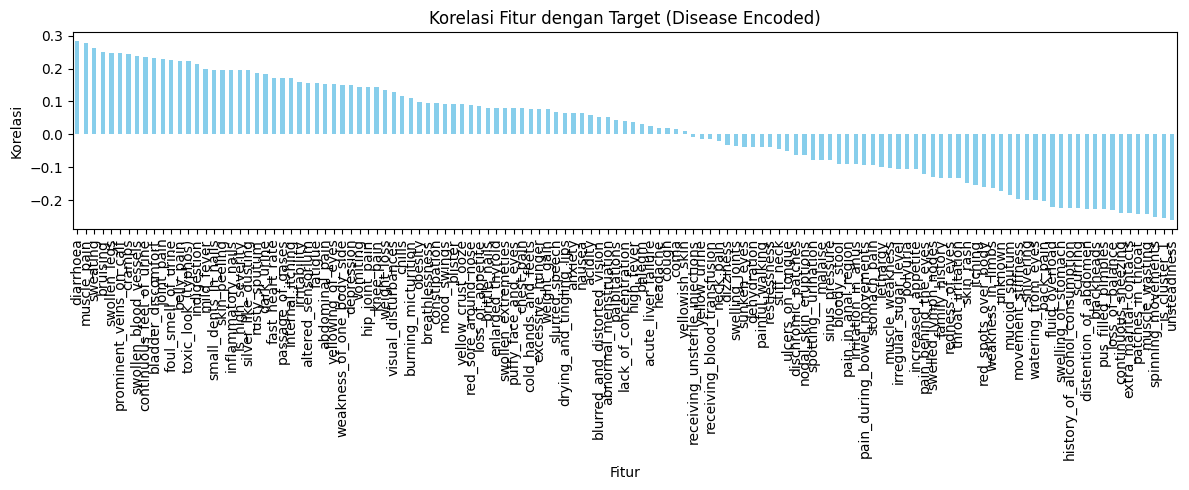

In [61]:
correlation_matrix = X_train_bnb.corrwith(pd.Series(y_train_bnb))

# Visualisasi korelasi fitur dengan target
plt.figure(figsize=(12, 5))
correlation_matrix.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Korelasi Fitur dengan Target (Disease Encoded)')
plt.ylabel('Korelasi')
plt.xlabel('Fitur')
plt.tight_layout()
plt.show()

# #DEPLOYMENT

In [62]:
from joblib import dump


dump(disease_encoder, 'disease_encoder.joblib')

dump(mlb, 'mlb.joblib')

['mlb.joblib']

In [63]:
!ngrok config add-authtoken 2OJKDLMDoMzmO6XZodWzWilW2g2_3PALxmeb1F1j3zhAYn1g1

Authtoken saved to configuration file: C:\Users\redst\AppData\Local/ngrok/ngrok.yml


In [64]:
%%writefile app_bnb.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import traceback
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

st.set_page_config(
    page_title="Dashboard Penyakit",
    page_icon="🩺",
)

st.title("Aplikasi Penyakit: Klasifikasi & Clustering")

@st.cache_resource
def load_resources():
    try:
        model = joblib.load('diseaseprediction.joblib')
        disease_encoder = joblib.load('disease_encoder.joblib')
        mlb = joblib.load('mlb.joblib')
        df = pd.read_csv('dataset.csv')
        try:
            symptom_severity = pd.read_csv('Symptom-severity.csv')
            symptom_severity.columns = symptom_severity.columns.str.strip().str.lower()
        except Exception:
            symptom_severity = None
        try:
            desc_df = pd.read_csv('symptom_Description.csv')
            desc_df.columns = desc_df.columns.str.strip().str.lower()
        except Exception:
            desc_df = None
        try:
            precaution_df = pd.read_csv('symptom_precaution.csv')
            precaution_df.columns = precaution_df.columns.str.strip().str.lower()
        except Exception:
            precaution_df = None
        return model, disease_encoder, mlb, symptom_severity, desc_df, precaution_df, df
    except Exception as e:
        st.error(f"Error loading resources: {e}")
        st.stop()

model, disease_encoder, mlb, symptom_severity, desc_df, precaution_df, df = load_resources()

tab1, tab2 = st.tabs(["Klasifikasi Penyakit", "Clustering Gejala"])

with tab1:
    split_option = st.selectbox(
        "Pilih rasio data training : testing",
        options=["60:40", "70:30", "80:20"],
        index=1
    )
    split_dict = {"60:40": 0.4, "70:30": 0.3, "80:20": 0.2}
    test_size = split_dict[split_option]

    kolom = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']
    for i in kolom:
        df[i] = df[i].fillna('Unknown').astype(str).str.strip().str.lower().str.replace(' ', '_')
    symptom_lists_for_mlb = []
    for index, row in df.iterrows():
        row_symptoms = [s for s in row[kolom] if s != 'unknown']
        symptom_lists_for_mlb.append(row_symptoms)
    symptom_binary_features = mlb.transform(symptom_lists_for_mlb)
    symptom_binary_df = pd.DataFrame(symptom_binary_features, columns=mlb.classes_)
    if symptom_severity is not None:
        weights = symptom_severity.set_index('symptom').to_dict()['weight']
        df['severity_score'] = df[kolom].apply(lambda row: sum(weights.get(s, 0) for s in row if s in weights), axis=1)
        q2 = df['severity_score'].quantile(0.66)
        df['is_high_severity'] = df['severity_score'].apply(lambda x: 1 if x > q2 else 0)
    else:
        df['is_high_severity'] = 0
    df['is_cluster_1'] = 0
    y = disease_encoder.transform(df['Disease'])
    X = pd.concat([df[['is_high_severity', 'is_cluster_1']], symptom_binary_df], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    n_classes = len(disease_encoder.classes_)
    st.subheader("🧪 Evaluasi Model Penyakit")
    col1, col2 = st.columns(2)
    with col1:
        st.metric("Classes", n_classes)
    with col2:
        st.metric("Test Samples", len(y_test))
    col3, col4, col5, col6 = st.columns(4)
    with col3:
        st.metric("Accuracy", f"{accuracy:.2f}")
    with col4:
        st.metric("Precision", f"{precision:.2f}")
    with col5:
        st.metric("Recall", f"{recall:.2f}")
    with col6:
        st.metric("F1-score", f"{f1:.2f}")

    from sklearn.model_selection import cross_val_score

    # Lakukan cross-validation hanya saat model sudah dilatih dan X_train, y_train tersedia
    with st.expander("📊 Cross-Validation (10-fold)", expanded=False):
        try:
            cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
            mean_cv = cv_scores.mean()
            std_cv = cv_scores.std()
            st.write(f"*Akurasi Cross-Validation (10-fold):* {cv_scores}")
            st.write(f"*Rata-rata Akurasi:* {mean_cv:.4f}")
            st.write(f"*Standar Deviasi Akurasi:* {std_cv:.4f}")
            st.write(f"*Akurasi pada Test Set:* {accuracy:.4f}")
            if abs(mean_cv - accuracy) < 0.05:
                st.success("✅ Model menunjukkan konsistensi antara cross-validation dan test set.")
            else:
                st.warning("⚠ Performa cross-validation dan test set berbeda signifikan. Perlu investigasi lebih lanjut.")
        except Exception as e:
            st.error(f"Gagal menghitung cross-validation: {e}")


    st.markdown("---")
    st.header("🔍 Klasifikasi Penyakit")
    available_symptoms_for_multiselect = list(mlb.classes_)
    with st.form("prediction_form"):
        selected_symptoms_raw = st.multiselect(
            "Pilih gejala yang dialami:",
            options=available_symptoms_for_multiselect,
            help="Pilih satu atau lebih gejala dari daftar"
        )
        predict_btn = st.form_submit_button("🧠 Klasifikasi Penyakit", use_container_width=True)
    input_symptoms = [selected_symptoms_raw]
    input_binary = mlb.transform(input_symptoms)
    is_high_severity = 0
    severity_score = 0
    if symptom_severity is not None and selected_symptoms_raw:
        weights = symptom_severity.set_index('symptom').to_dict()['weight']
        severity_score = sum(weights.get(symptom, 0) for symptom in selected_symptoms_raw)
        q2 = symptom_severity['weight'].quantile(0.66)
        is_high_severity = int(severity_score > q2)
    is_cluster_1 = 0
    input_df = pd.DataFrame(input_binary, columns=mlb.classes_)
    input_df['is_high_severity'] = is_high_severity
    input_df['is_cluster_1'] = is_cluster_1
    model_features = model.feature_names_in_ if hasattr(model, "feature_names_in_") else input_df.columns
    input_df = input_df.reindex(columns=model_features, fill_value=0)
    if predict_btn:
        try:
            probabilities = model.predict_proba(input_df)
            n_classes = len(disease_encoder.classes_)
            if probabilities is not None and probabilities.ndim == 2 and probabilities.shape[1] == n_classes:
                predicted_idx = np.argmax(probabilities)
                disease_name = disease_encoder.inverse_transform([predicted_idx])[0]
                st.success("📋 Hasil Klasifikasi")
                st.markdown(f"🦠 *Penyakit:* <span style='font-size: 1.2em; color: #28a745;'><b>{str(disease_name).strip()}</b></span>", unsafe_allow_html=True)
                st.markdown("---")
                if desc_df is not None:
                    desc_row = desc_df[desc_df['disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not desc_row.empty:
                        st.info(f"📖 Deskripsi: {desc_row['description'].values[0]}", icon="ℹ")
                    else:
                        st.caption(f"Deskripsi tidak tersedia untuk '{str(disease_name).strip()}'.")
                if precaution_df is not None:
                    precaution_row = precaution_df[precaution_df['disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not precaution_row.empty:
                        precautions = [str(p).strip() for p in precaution_row.iloc[0, 1:].values if pd.notna(p) and str(p).strip().lower() not in ['nan', '']]
                        if precautions:
                            st.warning("🛡 Tindakan Pencegahan & Saran:")
                            for i, p_text in enumerate(precautions, 1):
                                st.write(f"{i}. {p_text}")
                        else:
                            st.caption(f"Tindakan pencegahan tidak spesifik atau tidak tersedia untuk '{str(disease_name).strip()}'.")
                    else:
                        st.caption(f"Informasi tindakan pencegahan tidak ditemukan untuk '{str(disease_name).strip()}'.")
                st.markdown("---")
                if symptom_severity is not None and selected_symptoms_raw:
                    weights = symptom_severity.set_index('symptom').to_dict()['weight']
                    current_user_severity_score = sum(weights.get(symptom, 0) for symptom in selected_symptoms_raw)
                    severity_q1_threshold = df['severity_score'].quantile(0.33) if 'severity_score' in df else 1
                    severity_q2_threshold = df['severity_score'].quantile(0.66) if 'severity_score' in df else 2
                    if current_user_severity_score <= severity_q1_threshold:
                        severity_category = "Rendah"
                    elif current_user_severity_score <= severity_q2_threshold:
                        severity_category = "Sedang"
                    else:
                        severity_category = "Tinggi"
                    st.info(f"📊 Total Skor Keparahan Gejala (berdasarkan input): {current_user_severity_score} (Kategori: {severity_category}).")
                else:
                    st.info("ℹ Skor keparahan gejala tidak dapat dihitung (data 'Symptom-severity.csv' tidak tersedia atau kosong), sehingga kategori tidak dapat ditentukan.")
            else:
                st.error("Tidak dapat menghitung probabilitas prediksi. Model mungkin tidak mengembalikan output yang diharapkan atau jumlah kelas tidak sesuai.")
        except Exception as e:
            st.error(f"Terjadi error saat Klasifikasi: {e}")
            st.text(traceback.format_exc())
    st.markdown("---")
    st.caption("⚕ Aplikasi ini untuk tujuan informasi dan edukasi saja. Selalu konsultasikan dengan profesional medis atau dokter untuk diagnosis dan perawatan yang akurat.", unsafe_allow_html=True)

with tab2:
    st.header("🔬 Clustering Gejala (KMeans)")
    kolom = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']
    for i in kolom:
        df[i] = df[i].fillna('Unknown').astype(str).str.strip().str.lower().str.replace(' ', '_')
    symptom_lists_for_mlb = []
    for index, row in df.iterrows():
        row_symptoms = [s for s in row[kolom] if s != 'unknown']
        symptom_lists_for_mlb.append(row_symptoms)
    symptom_binary_features = mlb.transform(symptom_lists_for_mlb)
    symptom_binary_df = pd.DataFrame(symptom_binary_features, columns=mlb.classes_)
    if symptom_severity is not None:
        weights = symptom_severity.set_index('symptom').to_dict()['weight']
        df['severity_score'] = df[kolom].apply(lambda row: sum(weights.get(s, 0) for s in row if s in weights), axis=1)
    else:
        df['severity_score'] = 0
    X_cluster_features = symptom_binary_df.copy()
    X_cluster_features['severity_score'] = df['severity_score']
    k = st.slider("Pilih jumlah cluster (k)", min_value=2, max_value=6, value=2)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_cluster_features)
    df['cluster'] = clusters
    st.write("Distribusi jumlah data per cluster:")
    st.write(df['cluster'].value_counts())
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster_features)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("Visualisasi Cluster Penyakit (PCA)")
    st.pyplot(fig)

    from sklearn.metrics import silhouette_score, davies_bouldin_score

    if len(X_cluster_features) > 1 and len(np.unique(clusters)) > 1:
        silhouette_avg = silhouette_score(X_cluster_features, clusters)
        dbi = davies_bouldin_score(X_cluster_features, clusters)
        col1, col2 = st.columns(2)
        with col1:
            st.metric("Silhouette Score", f"{silhouette_avg:.4f}")
        with col2:
            st.metric("Davies-Bouldin Index", f"{dbi:.4f}")
    else:
        st.warning("Tidak cukup data atau cluster untuk menghitung metrik clustering.")

Overwriting app_bnb.py


In [65]:
from pyngrok import ngrok
import threading
import time
import os

In [66]:
def run_streamlit():
    os.system("streamlit run app_bnb.py --server.port 8502")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8502)
print(f"Streamlit app is live at: {public_url}")


t=2025-06-16T20:37:39+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
t=2025-06-16T20:37:39+0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration fil

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.